In [71]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## Load Dataset

In [72]:

file_path = '/content/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(file_path)

display(df.head())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [73]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [74]:
print(df.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


# Understanding each feature based on domain knowledge

Following are some of the assumptions around data and domain that i started with. I validated with EDA below

In [75]:
# gender -> Categorical (Male, Female)
# SeniorCitizen -> Bool (yes and no)
# Partner -> Yes and No
# Dependent -> Yes and No
# tenure -> # of months the customer has stayed with the company.
            # Assumption is higher the number, higher the loyalty
            # and people rarely change telco provider
            # and even if they change, either they change at starting or at yearly like 1 year, 2 year (maybe in contract and more sunk cost)
# PhoneService -> Yes and No and others
            # Assumption: Majority of the internet is used my phone. If made experience on mobile, people will definitely churn
# MultipleLines -> Yes and No and No phone service
           # no idea what does it means - mean to chatgpt this
# InternetService -> DSL, Fiber optic and other
           # I assume:
              # DSL -> Slow internet -> bad experience -> no likely to churn
              # Fiber optic -> fast internet -> good experience -> less likely to churn
# OnlineSecurity -> Yes, no and No internet. No idea what does this means. need to chatgpt this
# OnlineBackup -> Yes, no and No internet. No idea what does this means. need to chatgpt this
# DeviceProtection -> Yes, no and No internet. No idea what does this means. need to chatgpt this
# TechSupport -> Yes, no and No internet.
             # Assumption: TechSupport -> gets problem address -> happy -> less likely to churn
             #.            No TechSupport -> doesnt gets problem address -> not satisfied -> more likely to churn

# StreamingTV ->  Yes, no and No internet.
            # if yes, means more vendor locked in (cross selling), get to experience whole range of service, less likely to churn
# StreamingMovies -> Yes, no and No internet. Maybe highly correlated with StreamingTV features. Need to check, but assumption is same

# Contract -> Month-to-month, One year, Two year.
              # if month to month, this means user can churn anytime.
              # in other year so need to check the tenure. 1 year contract and >= tenure -> happy. 1 year contract and tenure close to 11 month -> chances of losing customer if experience is bad

# PaperlessBilling -> true(yes) and false(no). Maybe highlight how tech savvy or young the user is. Maybe senior citizen is less likely to have paperless billing. Need to check

# PaymentMethod -> Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)
             # automatic ones faces usually less disruption as they pay usually on time
             # mailed check one could be more annoyed if disruption occurs due to late payment. they maybe more likely to be old as well


# MonthlyCharges -> Numerical feature. Monthly charges might be the sum of PhoneService +  MultipleLines + InternetService (fiber or dsl) + OnlineSecurity + OnlineBackup + DeviceProtection + TechSupport + StreamingTV + StreamingMovies
            # need to normalize it

# TotalCharges -> Numerical feature -> product of MonthlyCharges * tenure


# Churn -> Target


# EDA

 TotalCharges dt is object. It should be float64

In [76]:

print("\nData Types:")
print(df.dtypes)

print("\n" + "=" * 80)
print("Dataset Info:")
print("=" * 80)
df.info()


Data Types:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 

In [69]:

print("Missing values check:")
missing = df.isnull().sum()
if missing.sum() == 0:
    print("  No missing values found!")
else:
    print(missing[missing > 0])

print("\n\n")
duplicates = df.duplicated().sum()
print(f"Duplicate rows: {duplicates}")


print("\n\nUnique values per column:")
for col in df.columns:
    print(f"  {col}: {df[col].nunique()} unique values")



Missing values check:
tenure_group    11
dtype: int64



Duplicate rows: 0


Unique values per column:
  customerID: 7043 unique values
  gender: 2 unique values
  SeniorCitizen: 2 unique values
  Partner: 2 unique values
  Dependents: 2 unique values
  tenure: 73 unique values
  PhoneService: 2 unique values
  MultipleLines: 3 unique values
  InternetService: 3 unique values
  OnlineSecurity: 3 unique values
  OnlineBackup: 3 unique values
  DeviceProtection: 3 unique values
  TechSupport: 3 unique values
  StreamingTV: 3 unique values
  StreamingMovies: 3 unique values
  Contract: 3 unique values
  PaperlessBilling: 2 unique values
  PaymentMethod: 4 unique values
  MonthlyCharges: 1585 unique values
  TotalCharges: 6531 unique values
  Churn: 2 unique values
  Churn_numeric: 2 unique values
  tenure_group: 4 unique values
  num_services: 7 unique values
  charge_category: 3 unique values


In [77]:

print("\n✓ Data type issues:")
print(f"  TotalCharges type: {df['TotalCharges'].dtype} (should be numeric)")

df['TotalCharges_test'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
problematic_rows = df[df['TotalCharges_test'].isna()]

print(f"\n  Found {len(problematic_rows)} rows with non-numeric TotalCharges:")
if len(problematic_rows) > 0:
    print(problematic_rows[['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges']].head(10))
    print("\n  ⚠️ These customers have 0 tenure - TotalCharges should be 0")



✓ Data type issues:
  TotalCharges type: object (should be numeric)

  Found 11 rows with non-numeric TotalCharges:
      customerID  tenure  MonthlyCharges TotalCharges
488   4472-LVYGI       0           52.55             
753   3115-CZMZD       0           20.25             
936   5709-LVOEQ       0           80.85             
1082  4367-NUYAO       0           25.75             
1340  1371-DWPAZ       0           56.05             
3331  7644-OMVMY       0           19.85             
3826  3213-VVOLG       0           25.35             
4380  2520-SGTTA       0           20.00             
5218  2923-ARZLG       0           19.70             
6670  4075-WKNIU       0           73.35             

  ⚠️ These customers have 0 tenure - TotalCharges should be 0


In [78]:

# Fix TotalCharges -> converting to numeric and filling missing with 0
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce').fillna(0)

print(f"\nTotalCharges data type: {df['TotalCharges'].dtype}")
print(f"Missing values in TotalCharges: {df['TotalCharges'].isna().sum()}")

df.drop('TotalCharges_test', axis=1, inplace=True)



TotalCharges data type: float64
Missing values in TotalCharges: 0


## Test hypothesis: TotalCharges ≈ MonthlyCharges × tenure

Verified!

In [80]:

df['expected_total'] = df['MonthlyCharges'] * df['tenure']

df['total_difference'] = df['TotalCharges'] - df['expected_total']

print("Hypothesis: TotalCharges ≈ MonthlyCharges × tenure")
print("=" * 60)
print("\nDifference statistics:")
print(df['total_difference'].describe())

print("\n\nSample comparison (first 10 rows):")
print(df[['tenure', 'MonthlyCharges', 'TotalCharges', 'expected_total', 'total_difference']].head(10))

correlation = df['TotalCharges'].corr(df['expected_total'])
print(f"\n\nCorrelation between actual and expected TotalCharges: {correlation:.4f}")
print("Hypothesis VERIFIED!" if correlation > 0.99 else "⚠️ Hypothesis needs review")

df.drop(['expected_total', 'total_difference'], axis=1, inplace=True) # cleanup

Hypothesis: TotalCharges ≈ MonthlyCharges × tenure

Difference statistics:
count    7043.000000
mean        0.152953
std        67.202778
min      -370.850000
25%       -28.600000
50%         0.000000
75%        28.500000
max       373.250000
Name: total_difference, dtype: float64


Sample comparison (first 10 rows):
   tenure  MonthlyCharges  TotalCharges  expected_total  total_difference
0       1           29.85         29.85           29.85              0.00
1      34           56.95       1889.50         1936.30            -46.80
2       2           53.85        108.15          107.70              0.45
3      45           42.30       1840.75         1903.50            -62.75
4       2           70.70        151.65          141.40             10.25
5       8           99.65        820.50          797.20             23.30
6      22           89.10       1949.40         1960.20            -10.80
7      10           29.75        301.90          297.50              4.40
8      28      

# Analyze the Churn Column (Target Variable)

There exists class imbalance - have to handle this via maybe data augmentation or more penalty on classification at algo level


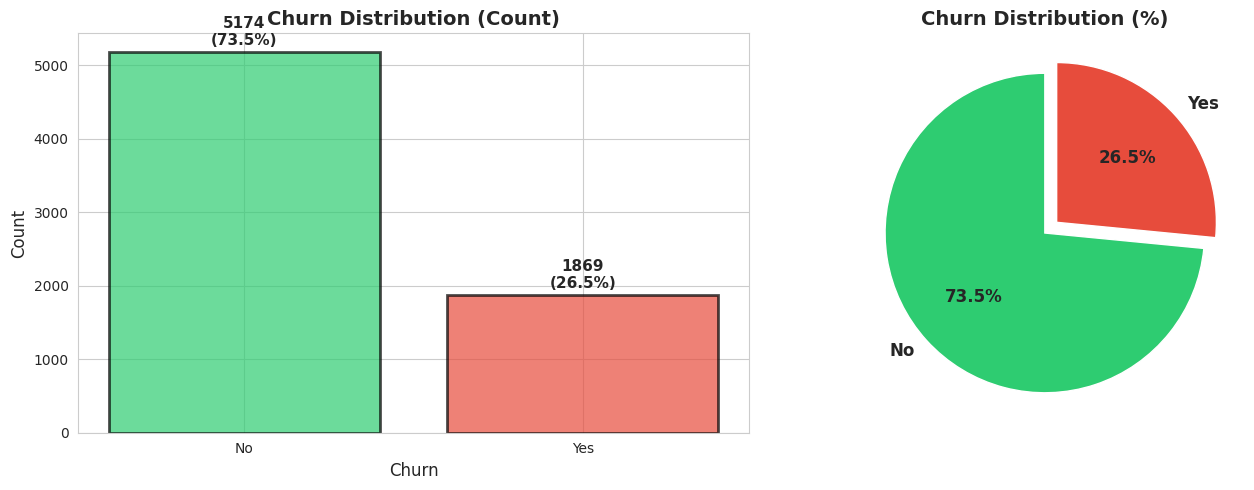

In [85]:

churn_counts = df['Churn'].value_counts()
churn_pct = df['Churn'].value_counts(normalize=True) * 100

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

colors = ['#2ecc71', '#e74c3c']
axes[0].bar(churn_counts.index, churn_counts.values, color=colors, alpha=0.7, edgecolor='black', linewidth=2)
axes[0].set_title('Churn Distribution (Count)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Churn', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
for i, (label, count) in enumerate(zip(churn_counts.index, churn_counts.values)):
    axes[0].text(i, count + 100, f'{count}\n({churn_pct[label]:.1f}%)',
                 ha='center', fontsize=11, fontweight='bold')

axes[1].pie(churn_counts.values, labels=churn_counts.index, autopct='%1.1f%%',
            colors=colors, startangle=90, explode=(0, 0.1),
            textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[1].set_title('Churn Distribution (%)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()



# Visualize distributions of numerical features


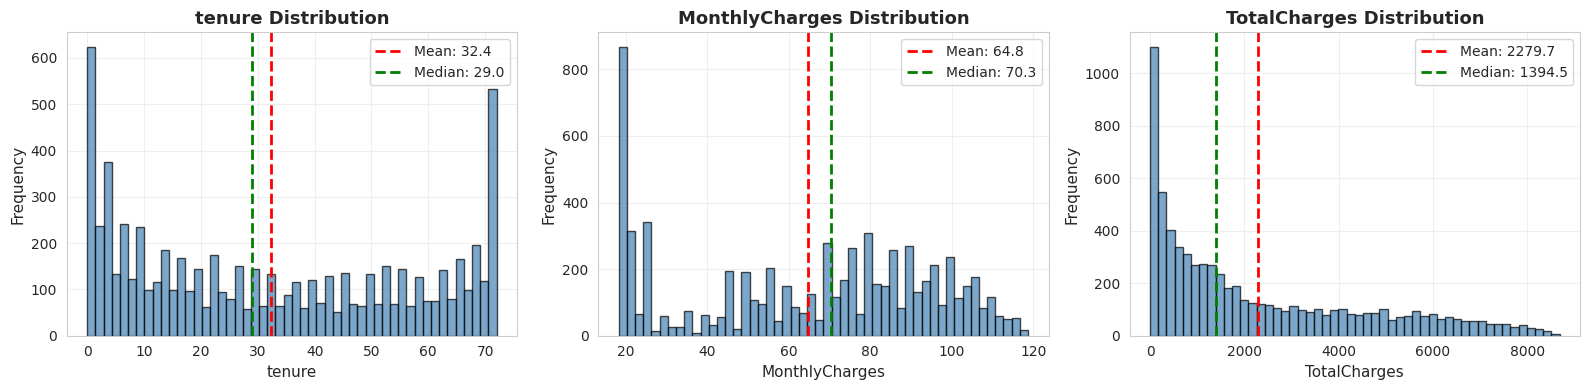

In [86]:


fig, axes = plt.subplots(1, 3, figsize=(16, 4))

for i, col in enumerate(['tenure', 'MonthlyCharges', 'TotalCharges']):
    axes[i].hist(df[col], bins=50, color='steelblue', alpha=0.7, edgecolor='black')
    axes[i].axvline(df[col].mean(), color='red', linestyle='--', linewidth=2,
                    label=f'Mean: {df[col].mean():.1f}')
    axes[i].axvline(df[col].median(), color='green', linestyle='--', linewidth=2,
                    label=f'Median: {df[col].median():.1f}')
    axes[i].set_title(f'{col} Distribution', fontsize=13, fontweight='bold')
    axes[i].set_xlabel(col, fontsize=11)
    axes[i].set_ylabel('Frequency', fontsize=11)
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



**Comparing the numerical features between churned and retained customers**


FINDINGS:

- Churned customers have LOWER tenure (less loyal)

- Churned customers have HIGHER monthly charges (maybe more **price** sensitivity)

- Churned customers have LOWER total charges (less investment)


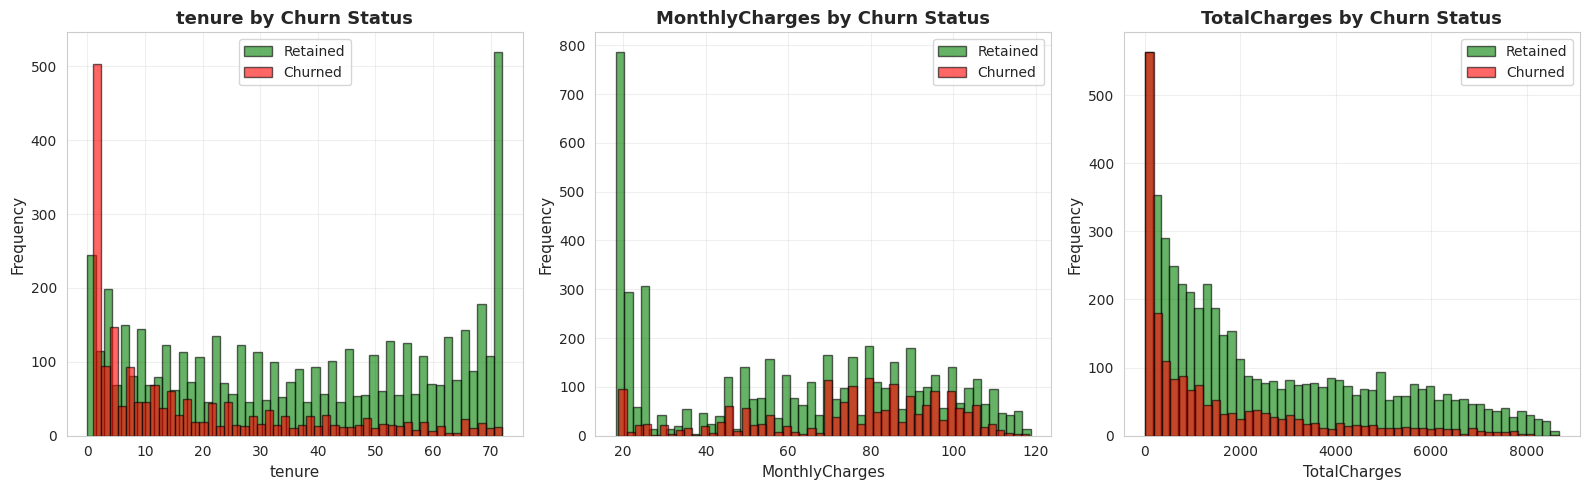

In [91]:

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

for i, col in enumerate(['tenure', 'MonthlyCharges', 'TotalCharges']):
    df[df['Churn'] == 'No'][col].hist(bins=50, alpha=0.6, label='Retained',
                                       color='green', ax=axes[i], edgecolor='black')
    df[df['Churn'] == 'Yes'][col].hist(bins=50, alpha=0.6, label='Churned',
                                        color='red', ax=axes[i], edgecolor='black')
    axes[i].set_title(f'{col} by Churn Status', fontsize=13, fontweight='bold')
    axes[i].set_xlabel(col, fontsize=11)
    axes[i].set_ylabel('Frequency', fontsize=11)
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


**Box plots shows the same story**


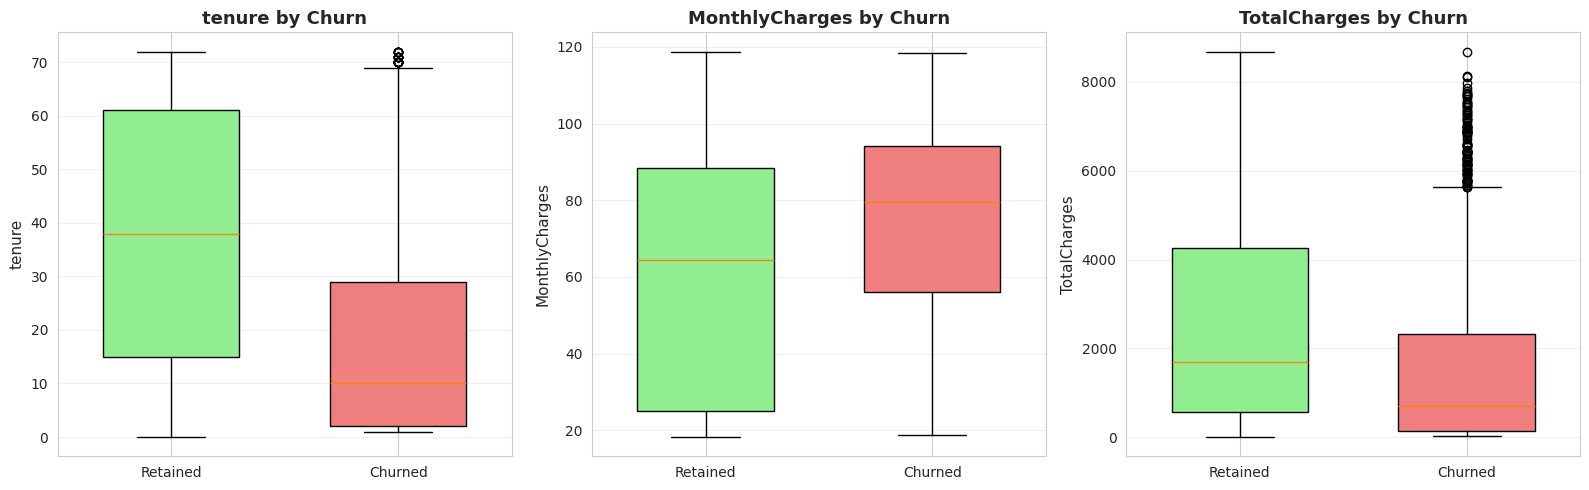

In [92]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

for i, col in enumerate(['tenure', 'MonthlyCharges', 'TotalCharges']):
    data_to_plot = [df[df['Churn'] == 'No'][col], df[df['Churn'] == 'Yes'][col]]
    bp = axes[i].boxplot(data_to_plot, labels=['Retained', 'Churned'], patch_artist=True,
                         widths=0.6)

    bp['boxes'][0].set_facecolor('lightgreen')
    bp['boxes'][1].set_facecolor('lightcoral')

    axes[i].set_title(f'{col} by Churn', fontsize=13, fontweight='bold')
    axes[i].set_ylabel(col, fontsize=11)
    axes[i].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

**Correlation between numerical features and churn**

INSIGHTS:
-  tenure has STRONGEST negative correlation with churn (-0.35)
- MonthlyCharges has positive correlation with churn (+0.19)


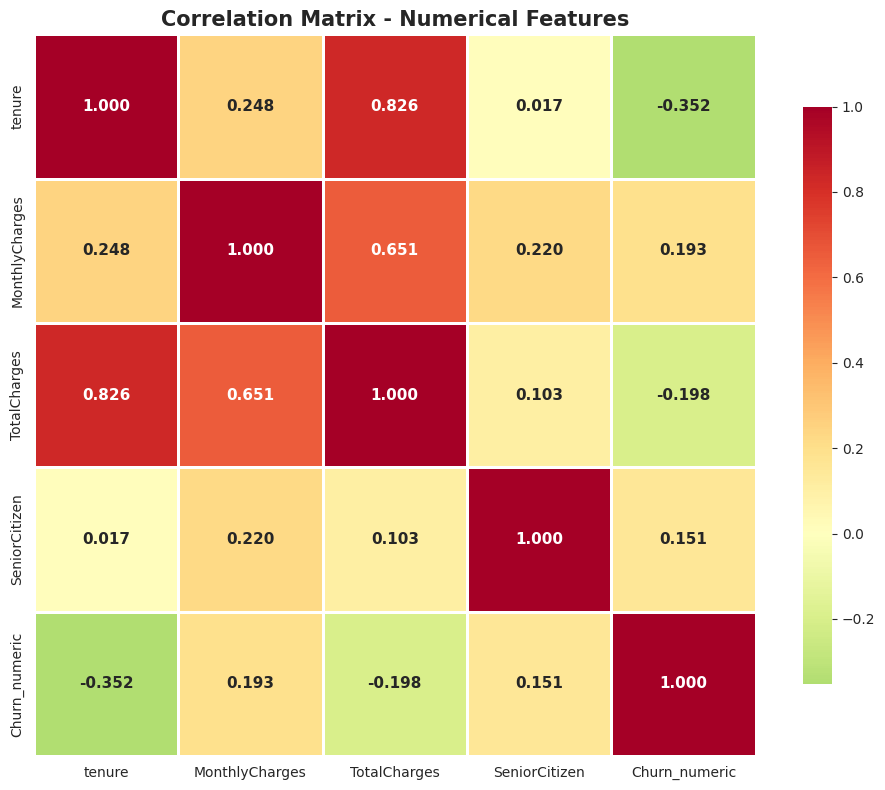

In [95]:

df['Churn_numeric'] = (df['Churn'] == 'Yes').astype(int)

corr_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen', 'Churn_numeric']
correlation_matrix = df[corr_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn_r', center=0,
            square=True, linewidths=2, cbar_kws={"shrink": 0.8}, fmt='.3f',
            annot_kws={'fontsize': 11, 'fontweight': 'bold'})
plt.title('Correlation Matrix - Numerical Features', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()



# Categorical Features Overview & Analysis

In [97]:

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
if 'customerID' in categorical_cols:
    categorical_cols.remove('customerID')
if 'Churn' in categorical_cols:
    categorical_cols.remove('Churn')


print(f"Found {len(categorical_cols)} categorical features:")
for col in categorical_cols:
    print(f"  • {col}")

print("\Value counts for each categorical feature:\n")
for col in categorical_cols:
    print(f"{col}:")
    print(df[col].value_counts())
    print("-" * 40)

Found 15 categorical features:
  • gender
  • Partner
  • Dependents
  • PhoneService
  • MultipleLines
  • InternetService
  • OnlineSecurity
  • OnlineBackup
  • DeviceProtection
  • TechSupport
  • StreamingTV
  • StreamingMovies
  • Contract
  • PaperlessBilling
  • PaymentMethod
\Value counts for each categorical feature:

gender:
gender
Male      3555
Female    3488
Name: count, dtype: int64
----------------------------------------
Partner:
Partner
No     3641
Yes    3402
Name: count, dtype: int64
----------------------------------------
Dependents:
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
----------------------------------------
PhoneService:
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
----------------------------------------
MultipleLines:
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
----------------------------------------
InternetService:
InternetService
Fiber optic   

Churn Rate Per Categorical Feature

In [98]:

churn_rates = {}
for col in categorical_cols:
    churn_rate = df.groupby(col)['Churn'].apply(lambda x: (x == 'Yes').sum() / len(x) * 100)
    churn_rates[col] = churn_rate.sort_values(ascending=False)

for col, rates in churn_rates.items():
    print(f"\n{col}:")
    for category, rate in rates.items():
        count = df[df[col] == category].shape[0]
        print(f"  {category}: {rate:.2f}% (n={count})")


gender:
  Female: 26.92% (n=3488)
  Male: 26.16% (n=3555)

Partner:
  No: 32.96% (n=3641)
  Yes: 19.66% (n=3402)

Dependents:
  No: 31.28% (n=4933)
  Yes: 15.45% (n=2110)

PhoneService:
  Yes: 26.71% (n=6361)
  No: 24.93% (n=682)

MultipleLines:
  Yes: 28.61% (n=2971)
  No: 25.04% (n=3390)
  No phone service: 24.93% (n=682)

InternetService:
  Fiber optic: 41.89% (n=3096)
  DSL: 18.96% (n=2421)
  No: 7.40% (n=1526)

OnlineSecurity:
  No: 41.77% (n=3498)
  Yes: 14.61% (n=2019)
  No internet service: 7.40% (n=1526)

OnlineBackup:
  No: 39.93% (n=3088)
  Yes: 21.53% (n=2429)
  No internet service: 7.40% (n=1526)

DeviceProtection:
  No: 39.13% (n=3095)
  Yes: 22.50% (n=2422)
  No internet service: 7.40% (n=1526)

TechSupport:
  No: 41.64% (n=3473)
  Yes: 15.17% (n=2044)
  No internet service: 7.40% (n=1526)

StreamingTV:
  No: 33.52% (n=2810)
  Yes: 30.07% (n=2707)
  No internet service: 7.40% (n=1526)

StreamingMovies:
  No: 33.68% (n=2785)
  Yes: 29.94% (n=2732)
  No internet service: 

**Statistical significance test for categorical features vs Churn (CHI-SQUARE TESTS)**


## Outcome & Analysis
The most contributing factor to churn are:
- Contract
   - Customers on month-to-month contracts are far more likely to churn  than those on two-year deals.
- Online Security & Tech Support
   -  Chi-Square values close to 850
   - suggests that customers who don't have these services -> more likely to churn
- Internet Service & Payment Method
   -  example: customers using "Electronic Check" often churn more than those on "Auto-pay."

**These are aligned with my earlier assumptions**

In [101]:

chi_square_results = []

for col in categorical_cols:
    contingency_table = pd.crosstab(df[col], df['Churn'])
    chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

    significance = '***' if p_value < 0.001 else '**' if p_value < 0.01 else '*' if p_value < 0.05 else 'ns'

    chi_square_results.append({
        'Feature': col,
        'Chi-Square': chi2,
        'p-value': p_value,
        'Significance': significance
    })

    print(f"{col:20s}: χ²={chi2:8.2f}, p-value={p_value:.6f} {significance}")

# Sort by significance
chi_df = pd.DataFrame(chi_square_results).sort_values('p-value')
print(" Features sorted by significance:")
chi_df

gender              : χ²=    0.48, p-value=0.486579 ns
Partner             : χ²=  158.73, p-value=0.000000 ***
Dependents          : χ²=  189.13, p-value=0.000000 ***
PhoneService        : χ²=    0.92, p-value=0.338783 ns
MultipleLines       : χ²=   11.33, p-value=0.003464 **
InternetService     : χ²=  732.31, p-value=0.000000 ***
OnlineSecurity      : χ²=  850.00, p-value=0.000000 ***
OnlineBackup        : χ²=  601.81, p-value=0.000000 ***
DeviceProtection    : χ²=  558.42, p-value=0.000000 ***
TechSupport         : χ²=  828.20, p-value=0.000000 ***
StreamingTV         : χ²=  374.20, p-value=0.000000 ***
StreamingMovies     : χ²=  375.66, p-value=0.000000 ***
Contract            : χ²= 1184.60, p-value=0.000000 ***
PaperlessBilling    : χ²=  258.28, p-value=0.000000 ***
PaymentMethod       : χ²=  648.14, p-value=0.000000 ***
 Features sorted by significance:


,Feature,Chi-Square,p-value,Significance
12,Contract,1184.596572,5.863038e-258,***
6,OnlineSecurity,849.998968,2.661150e-185,***
9,TechSupport,828.197068,1.443084e-180,***
5,InternetService,732.309590,9.571788e-160,***
14,PaymentMethod,648.142327,3.682355e-140,***
7,OnlineBackup,601.812790,2.079759e-131,***
8,DeviceProtection,558.419369,5.505219e-122,***
11,StreamingMovies,375.661479,2.667757e-82,***
10,StreamingTV,374.203943,5.528994e-82,***
13,PaperlessBilling,258.277649,4.073355e-58,***


# Tenure Analysis deep dive


ASSUMPTION VALIDATED!

  • Higher tenure = MUCH lower churn rate

  • 0-12 months: 47.7% churn (VERY HIGH RISK)

  • 48+ months: 9.5% churn (VERY LOW RISK)

  • New customers churn 5x more than long-term customers!
  

tenure_group
0-12 months     2175
12-24 months    1024
24-48 months    1594
48+ months      2239
Name: count, dtype: int64


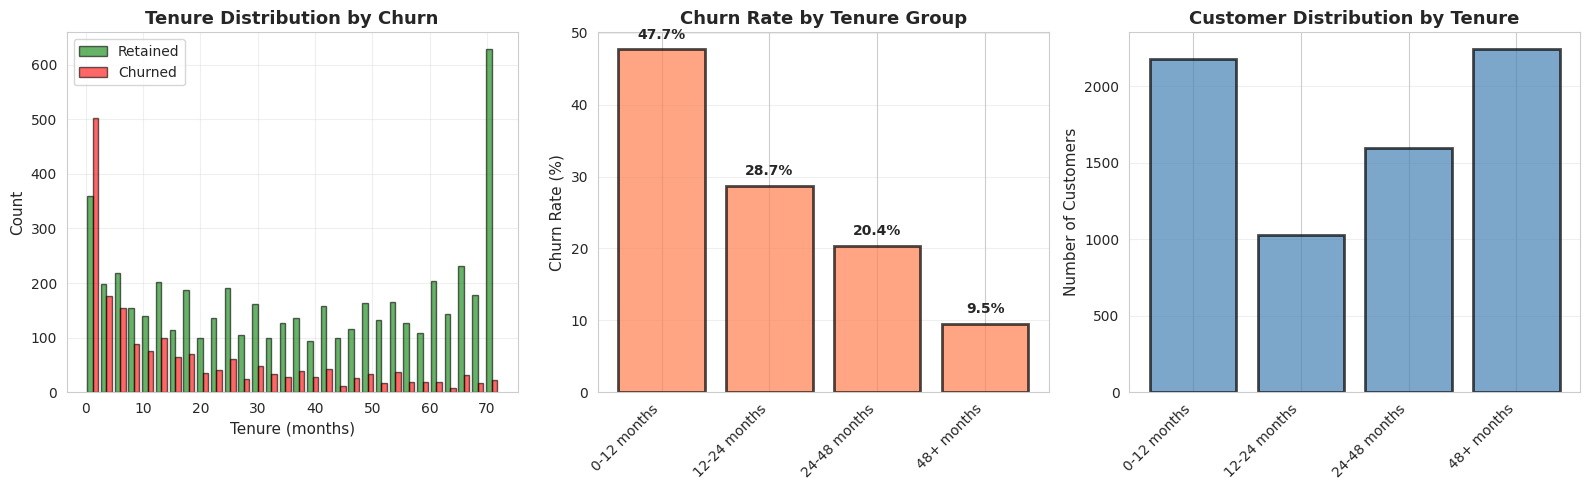

In [103]:


df['tenure_group'] = pd.cut(df['tenure'],
                            bins=[0, 12, 24, 48, 72],
                            labels=['0-12 months', '12-24 months', '24-48 months', '48+ months'])

tenure_dist = df['tenure_group'].value_counts().sort_index()
print(tenure_dist)

tenure_churn = df.groupby('tenure_group', observed=True)['Churn'].apply(lambda x: (x == 'Yes').sum() / len(x) * 100)
for group, rate in tenure_churn.items():
    count = df[df['tenure_group'] == group].shape[0]

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

axes[0].hist([df[df['Churn'] == 'No']['tenure'], df[df['Churn'] == 'Yes']['tenure']],
             bins=30, label=['Retained', 'Churned'], color=['green', 'red'],
             alpha=0.6, edgecolor='black')
axes[0].set_title('Tenure Distribution by Churn', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Tenure (months)', fontsize=11)
axes[0].set_ylabel('Count', fontsize=11)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].bar(range(len(tenure_churn)), tenure_churn.values, color='coral', alpha=0.7, edgecolor='black', linewidth=2)
axes[1].set_xticks(range(len(tenure_churn)))
axes[1].set_xticklabels(tenure_churn.index, rotation=45, ha='right')
axes[1].set_title('Churn Rate by Tenure Group', fontsize=13, fontweight='bold')
axes[1].set_ylabel('Churn Rate (%)', fontsize=11)
axes[1].grid(True, alpha=0.3, axis='y')
for j, val in enumerate(tenure_churn.values):
    axes[1].text(j, val + 1.5, f'{val:.1f}%', ha='center', fontsize=10, fontweight='bold')

axes[2].bar(range(len(tenure_dist)), tenure_dist.values, color='steelblue', alpha=0.7, edgecolor='black', linewidth=2)
axes[2].set_xticks(range(len(tenure_dist)))
axes[2].set_xticklabels(tenure_dist.index, rotation=45, ha='right')
axes[2].set_title('Customer Distribution by Tenure', fontsize=13, fontweight='bold')
axes[2].set_ylabel('Number of Customers', fontsize=11)
axes[2].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


# Analysing Internet Service

Outcome:
ASSUMPTION WRONG!

  • Fiber optic: 41.9% churn (HIGHEST)

  • DSL: 19.0% churn

  • No internet: 7.4% churn (LOWEST)
  

Fiber optic leads to more churn. Maybe because:
  1. Higher expectations not met
  2. Higher price -> price sensitivity
  3. More competitive market for fiber
  4. Technical issues with fiber rollout

Churn rate by Internet Service:
  Fiber optic    : 41.89% (n=3096)
  DSL            : 18.96% (n=2421)
  No             : 7.40% (n=1526)


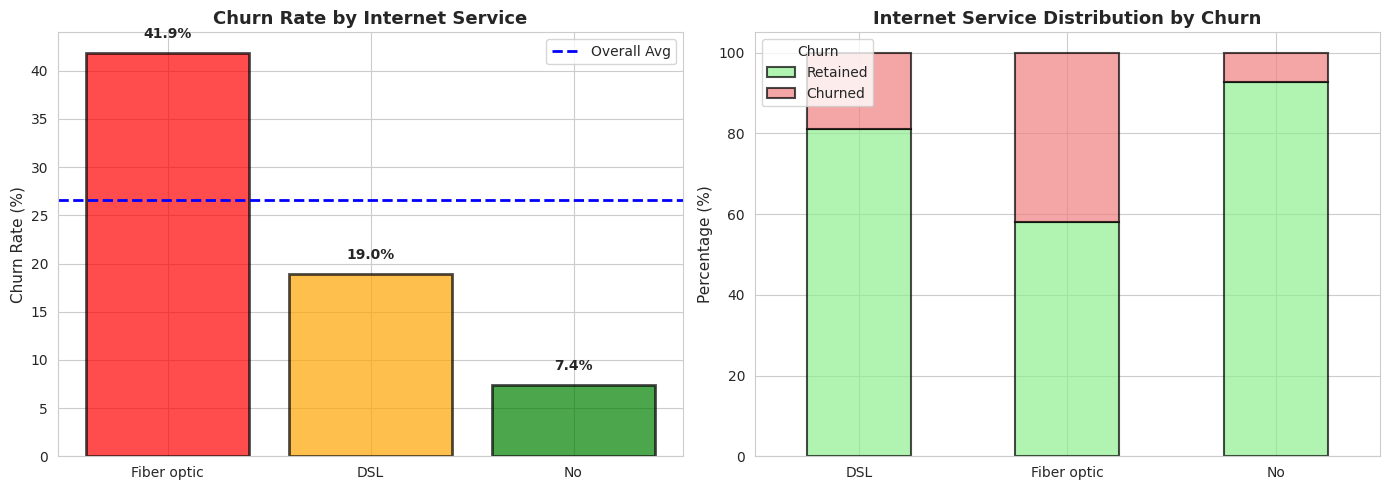

In [104]:


internet_churn = df.groupby('InternetService')['Churn'].apply(lambda x: (x == 'Yes').sum() / len(x) * 100).sort_values(ascending=False)

print("Churn rate by Internet Service:")
for service, rate in internet_churn.items():
    count = df[df['InternetService'] == service].shape[0]
    print(f"  {service:15s}: {rate:.2f}% (n={count})")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].bar(range(len(internet_churn)), internet_churn.values, color=['red', 'orange', 'green'],
            alpha=0.7, edgecolor='black', linewidth=2)
axes[0].set_xticks(range(len(internet_churn)))
axes[0].set_xticklabels(internet_churn.index)
axes[0].set_title('Churn Rate by Internet Service', fontsize=13, fontweight='bold')
axes[0].set_ylabel('Churn Rate (%)', fontsize=11)
axes[0].axhline(y=26.54, color='blue', linestyle='--', linewidth=2, label='Overall Avg')
axes[0].legend()
for j, val in enumerate(internet_churn.values):
    axes[0].text(j, val + 1.5, f'{val:.1f}%', ha='center', fontsize=10, fontweight='bold')

# Stacked bar
ct = pd.crosstab(df['InternetService'], df['Churn'], normalize='index') * 100
ct.plot(kind='bar', stacked=True, ax=axes[1], color=['lightgreen', 'lightcoral'],
        alpha=0.7, edgecolor='black', linewidth=1.5)
axes[1].set_title('Internet Service Distribution by Churn', fontsize=13, fontweight='bold')
axes[1].set_ylabel('Percentage (%)', fontsize=11)
axes[1].set_xlabel('')
axes[1].legend(title='Churn', labels=['Retained', 'Churned'])
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

Validating Assumption: More services = more vendor lock-in = less churn

Cross-selling effect
- More services leads to  LOWER churn (Cross-selling effect)
- 1 service: 45.8% churn vs 6 services: 5.3% churn
- Vendor lock-in effect is REAL

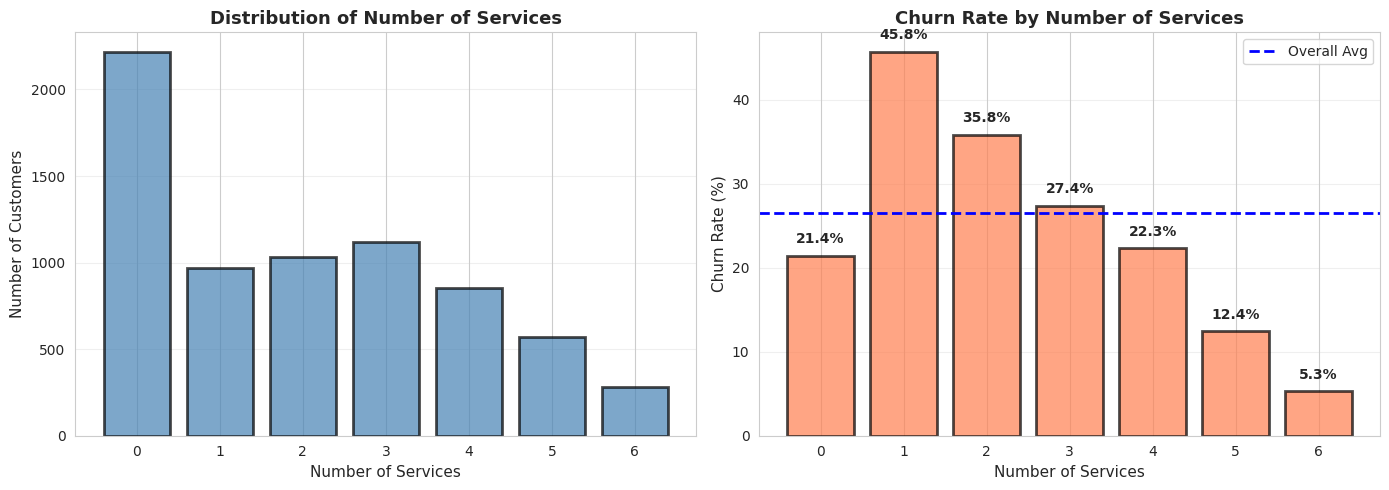

In [106]:


service_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport', 'StreamingTV', 'StreamingMovies']

df['num_services'] = 0
for col in service_cols:
    df['num_services'] += (df[col] == 'Yes').astype(int)


service_churn = df.groupby('num_services')['Churn'].apply(lambda x: (x == 'Yes').sum() / len(x) * 100).sort_values(ascending=False)
for num, rate in service_churn.items():
    count = df[df['num_services'] == num].shape[0]

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].bar(df['num_services'].value_counts().sort_index().index,
            df['num_services'].value_counts().sort_index().values,
            color='steelblue', alpha=0.7, edgecolor='black', linewidth=2)
axes[0].set_title('Distribution of Number of Services', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Number of Services', fontsize=11)
axes[0].set_ylabel('Number of Customers', fontsize=11)
axes[0].grid(True, alpha=0.3, axis='y')

axes[1].bar(service_churn.index, service_churn.values, color='coral', alpha=0.7, edgecolor='black', linewidth=2)
axes[1].set_title('Churn Rate by Number of Services', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Number of Services', fontsize=11)
axes[1].set_ylabel('Churn Rate (%)', fontsize=11)
axes[1].axhline(y=26.54, color='blue', linestyle='--', linewidth=2, label='Overall Avg')
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')
for i, val in enumerate(service_churn.values):
    axes[1].text(service_churn.index[i], val + 1.5, f'{val:.1f}%',
                 ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()



Test assumption:
- does Month-to-month ->  high risk
- Longer contracts = more committed = less churn?

Outcome:
- Month-to-month: 42.7% churn (15x higher than Two year!)
- Contract type is STRONGEST predictor
- Commitment = lower churn

  Month-to-month : 42.71% (n=3875)
  One year       : 11.27% (n=1473)
  Two year       : 2.83% (n=1695)
  Month-to-month : 18.0 months
  One year       : 42.0 months
  Two year       : 56.7 months


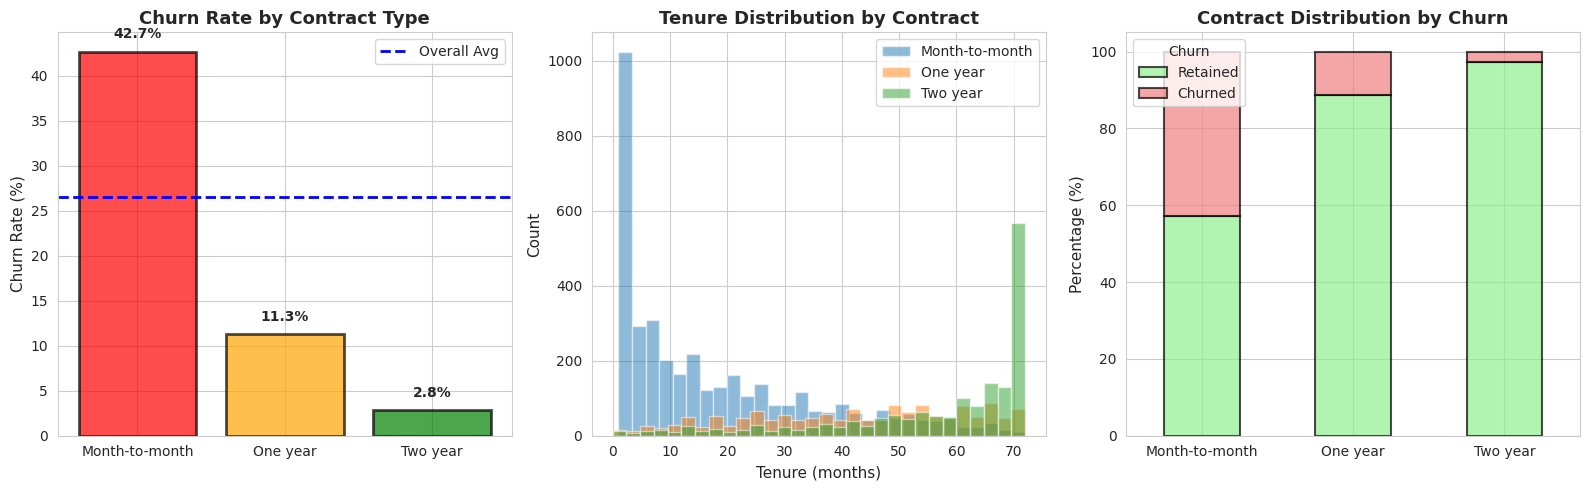

In [109]:


contract_churn = df.groupby('Contract')['Churn'].apply(lambda x: (x == 'Yes').sum() / len(x) * 100).sort_values(ascending=False)

for contract, rate in contract_churn.items():
    count = df[df['Contract'] == contract].shape[0]
    print(f"  {contract:15s}: {rate:.2f}% (n={count})")

for contract in df['Contract'].unique():
    avg_tenure = df[df['Contract'] == contract]['tenure'].mean()
    print(f"  {contract:15s}: {avg_tenure:.1f} months")

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

axes[0].bar(range(len(contract_churn)), contract_churn.values,
            color=['red', 'orange', 'green'], alpha=0.7, edgecolor='black', linewidth=2)
axes[0].set_xticks(range(len(contract_churn)))
axes[0].set_xticklabels(contract_churn.index)
axes[0].set_title('Churn Rate by Contract Type', fontsize=13, fontweight='bold')
axes[0].set_ylabel('Churn Rate (%)', fontsize=11)
axes[0].axhline(y=26.54, color='blue', linestyle='--', linewidth=2, label='Overall Avg')
axes[0].legend()
for j, val in enumerate(contract_churn.values):
    axes[0].text(j, val + 1.5, f'{val:.1f}%', ha='center', fontsize=10, fontweight='bold')

for contract in df['Contract'].unique():
    df[df['Contract'] == contract]['tenure'].hist(bins=30, alpha=0.5, label=contract, ax=axes[1])
axes[1].set_title('Tenure Distribution by Contract', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Tenure (months)', fontsize=11)
axes[1].set_ylabel('Count', fontsize=11)
axes[1].legend()

ct = pd.crosstab(df['Contract'], df['Churn'], normalize='index') * 100
ct.plot(kind='bar', stacked=True, ax=axes[2], color=['lightgreen', 'lightcoral'],
        alpha=0.7, edgecolor='black', linewidth=1.5)
axes[2].set_title('Contract Distribution by Churn', fontsize=13, fontweight='bold')
axes[2].set_ylabel('Percentage (%)', fontsize=11)
axes[2].set_xlabel('')
axes[2].legend(title='Churn', labels=['Retained', 'Churned'])
axes[2].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()


# Payment Method Analysis

Test assumption:
- Automatic payment = less disruption = lower churn
- Manual payment = more hassle = higher churn


ASSUMPTION VALIDATED!
- Electronic check: 45.3% churn (HIGHEST)
- Automatic payments: ~15-17% churn (LOWEST)
- Automation reduces churn by 3x!

  Electronic check               (MANUAL): 45.29% (n=2365)
  Mailed check                   (MANUAL): 19.11% (n=1612)
  Bank transfer (automatic)      (AUTO): 16.71% (n=1544)
  Credit card (automatic)        (AUTO): 15.24% (n=1522)


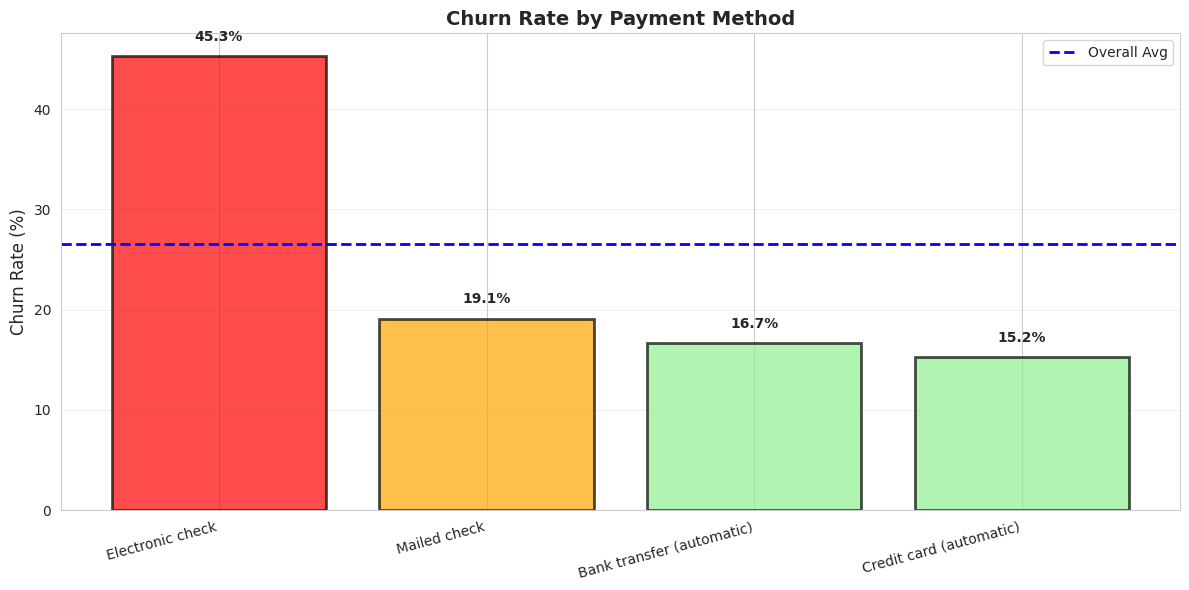

In [110]:


payment_churn = df.groupby('PaymentMethod')['Churn'].apply(lambda x: (x == 'Yes').sum() / len(x) * 100).sort_values(ascending=False)

for method, rate in payment_churn.items():
    count = df[df['PaymentMethod'] == method].shape[0]
    is_auto = 'automatic' in method.lower()
    auto_label = "(AUTO)" if is_auto else "(MANUAL)"
    print(f"  {method:30s} {auto_label}: {rate:.2f}% (n={count})")

plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(payment_churn)), payment_churn.values,
               color=['red', 'orange', 'lightgreen', 'lightgreen'],
               alpha=0.7, edgecolor='black', linewidth=2)
plt.xticks(range(len(payment_churn)), payment_churn.index, rotation=15, ha='right')
plt.title('Churn Rate by Payment Method', fontsize=14, fontweight='bold')
plt.ylabel('Churn Rate (%)', fontsize=12)
plt.axhline(y=26.54, color='blue', linestyle='--', linewidth=2, label='Overall Avg')
plt.legend()
plt.grid(True, alpha=0.3, axis='y')

for j, val in enumerate(payment_churn.values):
    plt.text(j, val + 1.5, f'{val:.1f}%', ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


# Analysing Senior Citizen and Family Status

Outcome:
- Seniors churn 1.8x more than non-seniors (41.7% vs 23.6%)
- Singles (no partner) churn 1.7x more (33.0% vs 19.7%)
- Customers without dependents churn 2x more (31.3% vs 15.5%)
-  Family stability = customer stability!

Churn rate by Senior Citizen status:
  Non-Senior (0): 23.61%
  Senior (1): 41.68%

Churn rate by Partner status:
  No: 32.96%
  Yes: 19.66%

✓ Churn rate by Dependents status:
  No: 31.28%
  Yes: 15.45%


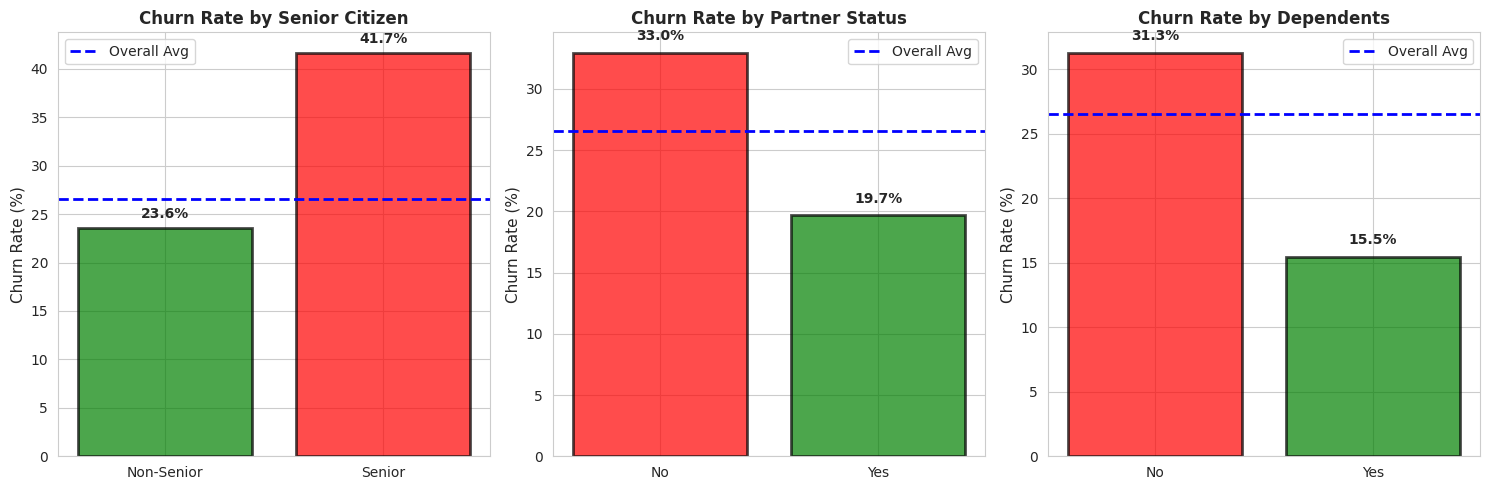

In [112]:

senior_churn = df.groupby('SeniorCitizen')['Churn'].apply(lambda x: (x == 'Yes').sum() / len(x) * 100)
print("Churn rate by Senior Citizen status:")
print(f"  Non-Senior (0): {senior_churn[0]:.2f}%")
print(f"  Senior (1): {senior_churn[1]:.2f}%")

partner_churn = df.groupby('Partner')['Churn'].apply(lambda x: (x == 'Yes').sum() / len(x) * 100).sort_values(ascending=False)
print("\nChurn rate by Partner status:")
for status, rate in partner_churn.items():
    print(f"  {status}: {rate:.2f}%")

dependent_churn = df.groupby('Dependents')['Churn'].apply(lambda x: (x == 'Yes').sum() / len(x) * 100).sort_values(ascending=False)
print("\n✓ Churn rate by Dependents status:")
for status, rate in dependent_churn.items():
    print(f"  {status}: {rate:.2f}%")

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].bar(['Non-Senior', 'Senior'], [senior_churn[0], senior_churn[1]],
            color=['green', 'red'], alpha=0.7, edgecolor='black', linewidth=2)
axes[0].set_title('Churn Rate by Senior Citizen', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Churn Rate (%)', fontsize=11)
axes[0].axhline(y=26.54, color='blue', linestyle='--', linewidth=2, label='Overall Avg')
axes[0].legend()
for i, val in enumerate([senior_churn[0], senior_churn[1]]):
    axes[0].text(i, val + 1, f'{val:.1f}%', ha='center', fontweight='bold')

axes[1].bar(range(len(partner_churn)), partner_churn.values,
            color=['red', 'green'], alpha=0.7, edgecolor='black', linewidth=2)
axes[1].set_xticks(range(len(partner_churn)))
axes[1].set_xticklabels(partner_churn.index)
axes[1].set_title('Churn Rate by Partner Status', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Churn Rate (%)', fontsize=11)
axes[1].axhline(y=26.54, color='blue', linestyle='--', linewidth=2, label='Overall Avg')
axes[1].legend()
for i, val in enumerate(partner_churn.values):
    axes[1].text(i, val + 1, f'{val:.1f}%', ha='center', fontweight='bold')

axes[2].bar(range(len(dependent_churn)), dependent_churn.values,
            color=['red', 'green'], alpha=0.7, edgecolor='black', linewidth=2)
axes[2].set_xticks(range(len(dependent_churn)))
axes[2].set_xticklabels(dependent_churn.index)
axes[2].set_title('Churn Rate by Dependents', fontsize=12, fontweight='bold')
axes[2].set_ylabel('Churn Rate (%)', fontsize=11)
axes[2].axhline(y=26.54, color='blue', linestyle='--', linewidth=2, label='Overall Avg')
axes[2].legend()
for i, val in enumerate(dependent_churn.values):
    axes[2].text(i, val + 1, f'{val:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()




 # Paperless Billing Analysis

Testing the assumption:
- Paperless billing = tech-savvy = younger = ?
- Check correlation with Senior Citizen


Outcome:
- Paperless billing customers churn MORE (33.6% vs 16.3%)
- Seniors are LESS likely to have paperless billing
- But paperless ≠ younger necessarily (correlation exists but not strong)

Churn rate by Paperless Billing:
  Yes: 33.57% (n=4171)
  No: 16.33% (n=2872)
Paperless Billing vs Senior Citizen:
SeniorCitizen             0          1
PaperlessBilling                      
No                44.162006  23.292469
Yes               55.837994  76.707531


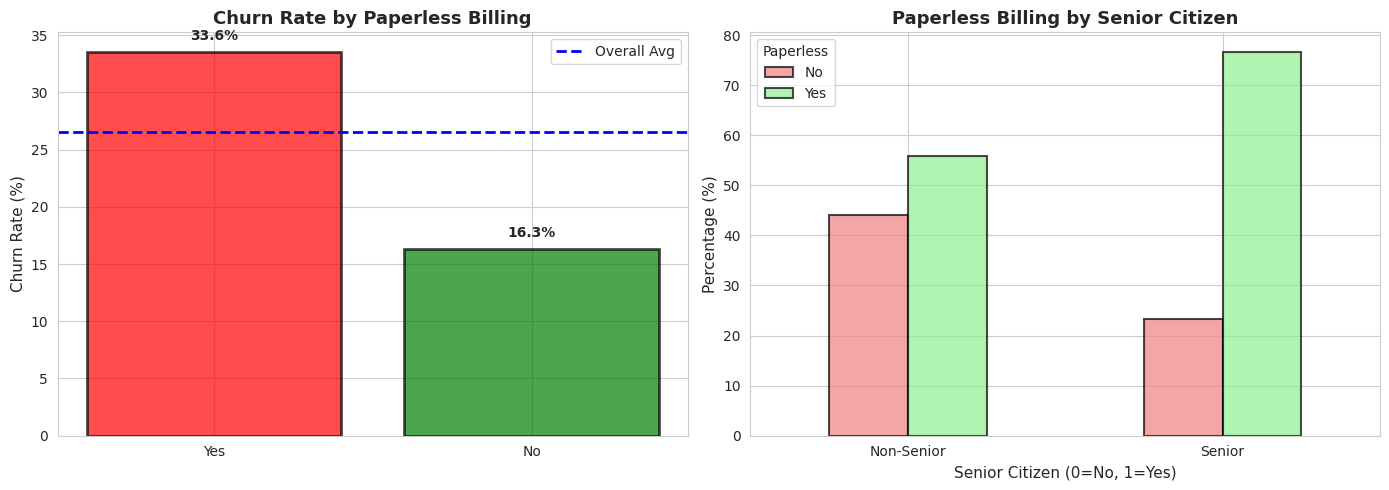

In [114]:


paperless_churn = df.groupby('PaperlessBilling')['Churn'].apply(lambda x: (x == 'Yes').sum() / len(x) * 100).sort_values(ascending=False)

print("Churn rate by Paperless Billing:")
for status, rate in paperless_churn.items():
    count = df[df['PaperlessBilling'] == status].shape[0]
    print(f"  {status}: {rate:.2f}% (n={count})")

print("Paperless Billing vs Senior Citizen:")
cross_tab = pd.crosstab(df['PaperlessBilling'], df['SeniorCitizen'], normalize='columns') * 100
print(cross_tab)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].bar(range(len(paperless_churn)), paperless_churn.values,
            color=['red', 'green'], alpha=0.7, edgecolor='black', linewidth=2)
axes[0].set_xticks(range(len(paperless_churn)))
axes[0].set_xticklabels(paperless_churn.index)
axes[0].set_title('Churn Rate by Paperless Billing', fontsize=13, fontweight='bold')
axes[0].set_ylabel('Churn Rate (%)', fontsize=11)
axes[0].axhline(y=26.54, color='blue', linestyle='--', linewidth=2, label='Overall Avg')
axes[0].legend()
for i, val in enumerate(paperless_churn.values):
    axes[0].text(i, val + 1, f'{val:.1f}%', ha='center', fontweight='bold')

cross_tab.T.plot(kind='bar', ax=axes[1], color=['lightcoral', 'lightgreen'],
                 alpha=0.7, edgecolor='black', linewidth=1.5)
axes[1].set_title('Paperless Billing by Senior Citizen', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Senior Citizen (0=No, 1=Yes)', fontsize=11)
axes[1].set_ylabel('Percentage (%)', fontsize=11)
axes[1].set_xticklabels(['Non-Senior', 'Senior'], rotation=0)
axes[1].legend(title='Paperless')

plt.tight_layout()
plt.show()


# Tech Support Analysis

Testing for: TechSupport -> problems addressed -> happy -> less churn




outcome (validated assumption):
-  No Tech Support: 41.6% churn
- Yes Tech Support: 15.2% churn
- Tech support reduces churn by 2.7x!

  No                  : 41.64% (n=3473)
  Yes                 : 15.17% (n=2044)
  No internet service : 7.40% (n=1526)


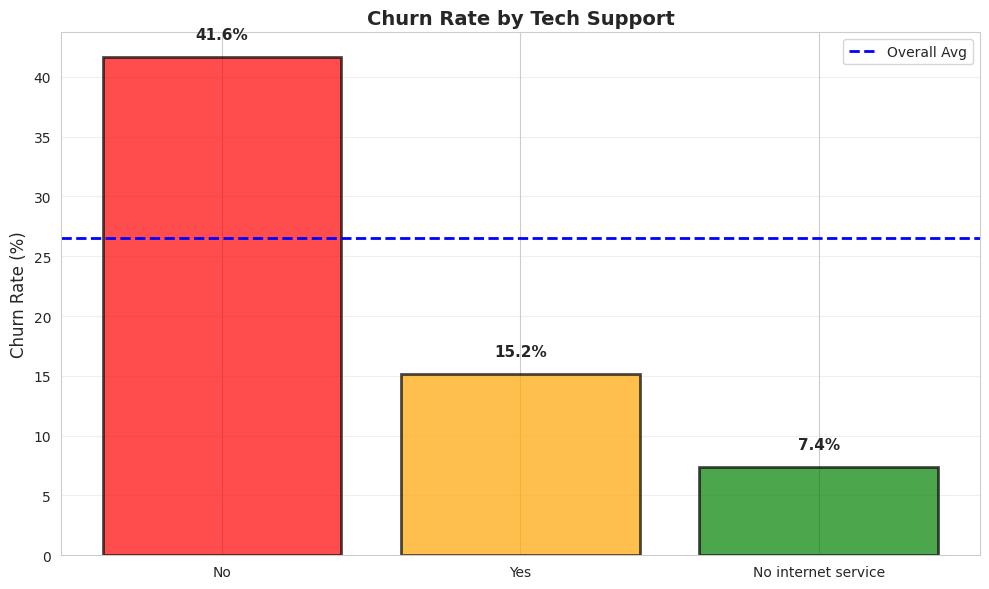

In [115]:


techsupport_churn = df.groupby('TechSupport')['Churn'].apply(lambda x: (x == 'Yes').sum() / len(x) * 100).sort_values(ascending=False)

for status, rate in techsupport_churn.items():
    count = df[df['TechSupport'] == status].shape[0]
    print(f"  {status:20s}: {rate:.2f}% (n={count})")

plt.figure(figsize=(10, 6))
bars = plt.bar(range(len(techsupport_churn)), techsupport_churn.values,
               color=['red', 'orange', 'green'], alpha=0.7, edgecolor='black', linewidth=2)
plt.xticks(range(len(techsupport_churn)), techsupport_churn.index)
plt.title('Churn Rate by Tech Support', fontsize=14, fontweight='bold')
plt.ylabel('Churn Rate (%)', fontsize=12)
plt.axhline(y=26.54, color='blue', linestyle='--', linewidth=2, label='Overall Avg')
plt.legend()
plt.grid(True, alpha=0.3, axis='y')

for j, val in enumerate(techsupport_churn.values):
    plt.text(j, val + 1.5, f'{val:.1f}%', ha='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()



#  Monthly Charges Deep Dive

Need to analyze the relationship between monthly charges and churn. Hypothesis is MonthlyCharges = sum of all services


Outcome:
- churned customer are price sensitive
- churned customers pay MORE on average
- price sensitivity is a major churn driver
- more services = higher charges (as expected)

  Low (<$35): 10.89% (n=1735)
  Medium ($35-70): 23.94% (n=1725)
  High (>$70): 35.36% (n=3583)
  0 services: $32.79
  1 services: $65.57
  2 services: $72.42
  3 services: $80.11
  4 services: $87.77
  5 services: $92.18
  6 services: $99.37


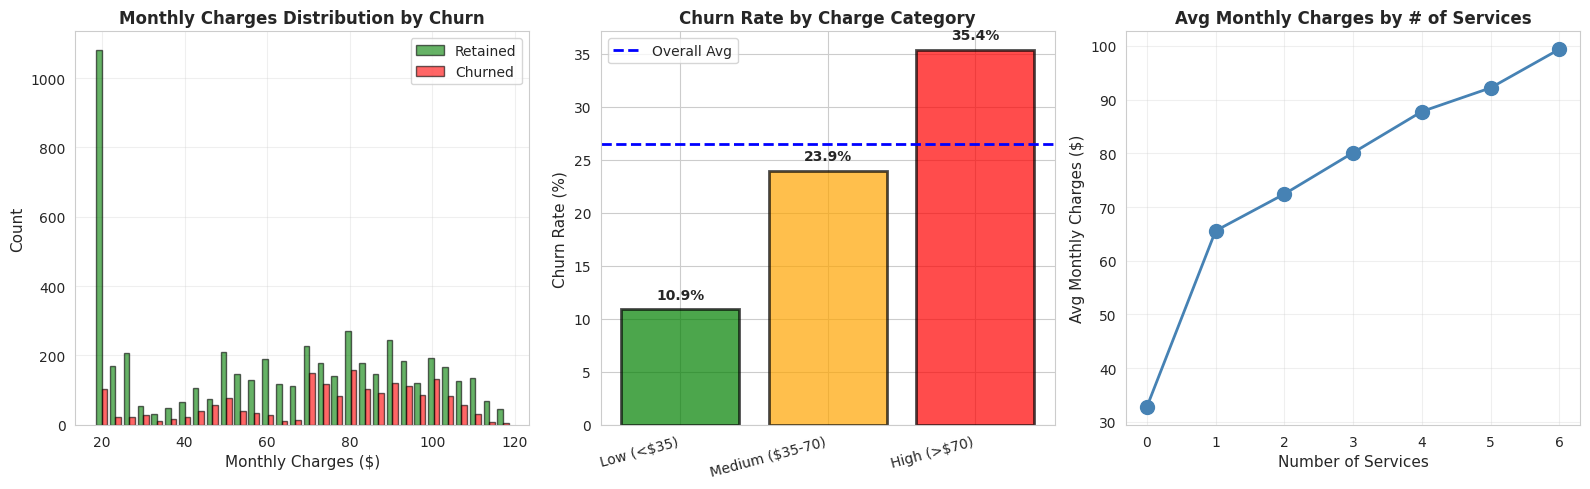

In [116]:

df['charge_category'] = pd.cut(df['MonthlyCharges'],
                               bins=[0, 35, 70, 120],
                               labels=['Low (<$35)', 'Medium ($35-70)', 'High (>$70)'])

charge_churn = df.groupby('charge_category', observed=True)['Churn'].apply(lambda x: (x == 'Yes').sum() / len(x) * 100)

for cat, rate in charge_churn.items():
    count = df[df['charge_category'] == cat].shape[0]
    print(f"  {cat}: {rate:.2f}% (n={count})")

avg_charges_by_services = df.groupby('num_services')['MonthlyCharges'].mean()
for num, avg in avg_charges_by_services.items():
    print(f"  {num} services: ${avg:.2f}")

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

axes[0].hist([df[df['Churn'] == 'No']['MonthlyCharges'],
              df[df['Churn'] == 'Yes']['MonthlyCharges']],
             bins=30, label=['Retained', 'Churned'],
             color=['green', 'red'], alpha=0.6, edgecolor='black')
axes[0].set_title('Monthly Charges Distribution by Churn', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Monthly Charges ($)', fontsize=11)
axes[0].set_ylabel('Count', fontsize=11)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].bar(range(len(charge_churn)), charge_churn.values,
            color=['green', 'orange', 'red'], alpha=0.7, edgecolor='black', linewidth=2)
axes[1].set_xticks(range(len(charge_churn)))
axes[1].set_xticklabels(charge_churn.index, rotation=15, ha='right')
axes[1].set_title('Churn Rate by Charge Category', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Churn Rate (%)', fontsize=11)
axes[1].axhline(y=26.54, color='blue', linestyle='--', linewidth=2, label='Overall Avg')
axes[1].legend()
for i, val in enumerate(charge_churn.values):
    axes[1].text(i, val + 1, f'{val:.1f}%', ha='center', fontweight='bold')

axes[2].plot(avg_charges_by_services.index, avg_charges_by_services.values,
            marker='o', linewidth=2, markersize=10, color='steelblue')
axes[2].set_title('Avg Monthly Charges by # of Services', fontsize=12, fontweight='bold')
axes[2].set_xlabel('Number of Services', fontsize=11)
axes[2].set_ylabel('Avg Monthly Charges ($)', fontsize=11)
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



#  Interaction Analysis - Contract × Internet Service

CRITICAL: Analyze interaction effects. Some combinations may be particularly risky

CRITICAL INSIGHT:
- Month-to-month + Fiber optic: 54.6% churn (HIGHEST RISK!)
- Two year + No internet: 0.8% churn (LOWEST RISK)
- Interaction effect is MASSIVE (68x difference!)

InternetService    DSL  Fiber optic     No
Contract                                  
Month-to-month   32.22        54.61  18.89
One year          9.30        19.29   2.47
Two year          1.91         7.23   0.78
Top 5 HIGH-RISK combinations:
  1. Month-to-month  + Fiber optic : 54.6% (n=2128)
  2. Month-to-month  + DSL         : 32.2% (n=1223)
  3. One year        + Fiber optic : 19.3% (n=539)
  4. Month-to-month  + No          : 18.9% (n=524)
  5. One year        + DSL         : 9.3% (n=570)
Top 5 LOW-RISK combinations:
  1. One year        + DSL         : 9.3% (n=570)
  2. Two year        + Fiber optic : 7.2% (n=429)
  3. One year        + No          : 2.5% (n=364)
  4. Two year        + DSL         : 1.9% (n=628)
  5. Two year        + No          : 0.8% (n=638)


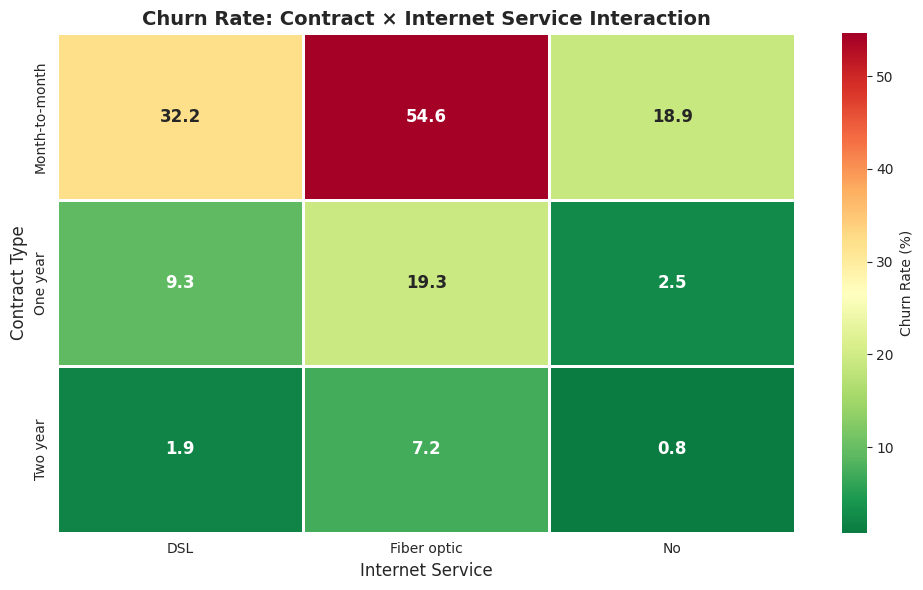

In [117]:

interaction1 = pd.crosstab(df['Contract'], df['InternetService'],
                           values=(df['Churn'] == 'Yes').astype(int),
                           aggfunc='mean') * 100

print(interaction1.round(2))

interaction_flat = interaction1.stack().sort_values(ascending=False)
print("Top 5 HIGH-RISK combinations:")
for i, (combo, rate) in enumerate(interaction_flat.head(5).items(), 1):
    count = len(df[(df['Contract'] == combo[0]) & (df['InternetService'] == combo[1])])
    print(f"  {i}. {combo[0]:15s} + {combo[1]:12s}: {rate:.1f}% (n={count})")

print("Top 5 LOW-RISK combinations:")
for i, (combo, rate) in enumerate(interaction_flat.tail(5).items(), 1):
    count = len(df[(df['Contract'] == combo[0]) & (df['InternetService'] == combo[1])])
    print(f"  {i}. {combo[0]:15s} + {combo[1]:12s}: {rate:.1f}% (n={count})")

plt.figure(figsize=(10, 6))
sns.heatmap(interaction1, annot=True, fmt='.1f', cmap='RdYlGn_r',
            center=26.54, linewidths=2, cbar_kws={'label': 'Churn Rate (%)'},
            annot_kws={'fontsize': 12, 'fontweight': 'bold'})
plt.title('Churn Rate: Contract × Internet Service Interaction', fontsize=14, fontweight='bold')
plt.ylabel('Contract Type', fontsize=12)
plt.xlabel('Internet Service', fontsize=12)
plt.tight_layout()
plt.show()




# Interaction Analysis - Payment Method × Contract

Outcome:
- Electronic check + Month-to-month: 53.7% churn
- Mailed check + Two year: 0.8% churn
- Automatic payments help even with month-to-month contracts!

Contract                   Month-to-month  One year  Two year
PaymentMethod                                                
Bank transfer (automatic)           34.13      9.72      3.37
Credit card (automatic)             32.78     10.30      2.24
Electronic check                    53.73     18.44      7.74
Mailed check                        31.58      6.82      0.79


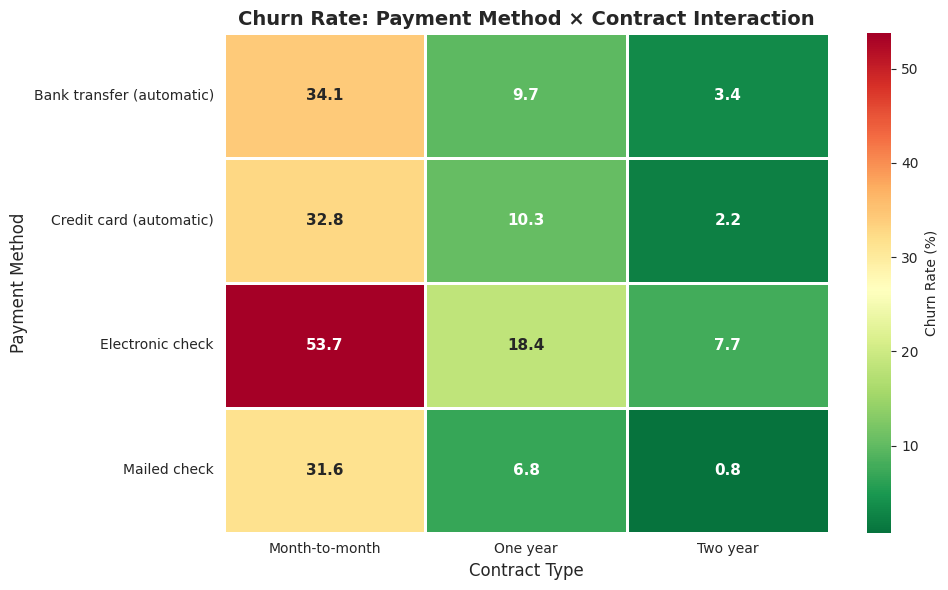

In [118]:

interaction2 = pd.crosstab(df['PaymentMethod'], df['Contract'],
                           values=(df['Churn'] == 'Yes').astype(int),
                           aggfunc='mean') * 100

print(interaction2.round(2))

# Visualize
plt.figure(figsize=(10, 6))
sns.heatmap(interaction2, annot=True, fmt='.1f', cmap='RdYlGn_r',
            center=26.54, linewidths=2, cbar_kws={'label': 'Churn Rate (%)'},
            annot_kws={'fontsize': 11, 'fontweight': 'bold'})
plt.title('Churn Rate: Payment Method × Contract Interaction', fontsize=14, fontweight='bold')
plt.ylabel('Payment Method', fontsize=12)
plt.xlabel('Contract Type', fontsize=12)
plt.tight_layout()
plt.show()



# Modeling

In [121]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (classification_report, confusion_matrix,
                            accuracy_score, precision_score, recall_score,
                            f1_score, roc_auc_score, roc_curve)

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## Feature Engineering


Created tenure-based features:
- tenure_group (categorical)
- is_new_customer (binary)
- is_very_new (binary)
- is_long_term (binary)
- tenure_squared (polynomial)
- tenure_bin (numeric)

In [124]:

# 1. Tenure groups (categorical)
df['tenure_group'] = pd.cut(df['tenure'],
                            bins=[0, 12, 24, 48, 100],
                            labels=['0-12_months', '12-24_months', '24-48_months', '48+_months'])

df['is_new_customer'] = (df['tenure'] <= 12).astype(int)
df['is_very_new'] = (df['tenure'] <= 6).astype(int)
df['is_long_term'] = (df['tenure'] >= 48).astype(int)

df['tenure_squared'] = df['tenure'] ** 2

df['tenure_bin'] = pd.cut(df['tenure'], bins=5, labels=[1, 2, 3, 4, 5]).astype(int)


# Show distribution
print(" New customer distribution:")
print(df['is_new_customer'].value_counts())
print(f"Churn rate for new customers: {df[df['is_new_customer']==1]['Churn'].value_counts(normalize=True).get('Yes', 0)*100:.1f}%")


 New customer distribution:
is_new_customer
0    4857
1    2186
Name: count, dtype: int64
Churn rate for new customers: 47.4%


## Feature Engineering for Service Utilization

New features:
- num_services (count)
- service_utilization_rate (ratio)
- has_streaming (binary)
- has_security_bundle (binary)
- has_premium_services (binary)
- service_diversity (weighted score)

In [127]:

service_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport', 'StreamingTV', 'StreamingMovies']

df['num_services'] = 0
for col in service_cols:
    df['num_services'] += (df[col] == 'Yes').astype(int)

df['service_utilization_rate'] = df['num_services'] / 6

df['has_streaming'] = ((df['StreamingTV'] == 'Yes') | (df['StreamingMovies'] == 'Yes')).astype(int)

df['has_security_bundle'] = ((df['OnlineSecurity'] == 'Yes') &
                              (df['TechSupport'] == 'Yes') &
                              (df['DeviceProtection'] == 'Yes')).astype(int)

df['has_premium_services'] = (df['num_services'] >= 4).astype(int)

df['service_diversity'] = (
    (df['OnlineSecurity'] == 'Yes').astype(int) * 2 +  # Security weighted higher
    (df['OnlineBackup'] == 'Yes').astype(int) * 1.5 +
    (df['DeviceProtection'] == 'Yes').astype(int) * 1.5 +
    (df['TechSupport'] == 'Yes').astype(int) * 2 +     # TechSupport weighted higher
    (df['StreamingTV'] == 'Yes').astype(int) * 1 +
    (df['StreamingMovies'] == 'Yes').astype(int) * 1
)


print(f"Average number of services: {df['num_services'].mean():.2f}")
print(f"Customers with 0 services: {(df['num_services']==0).sum()}")
print(f" Customers with 6 services: {(df['num_services']==6).sum()}")

Average number of services: 2.04
Customers with 0 services: 2219
 Customers with 6 services: 284


## Feature Engineering for Financial Features

New features:
- avg_monthly_spend
- charges_per_service
- total_to_monthly_ratio
- monthly_charges_category
- is_high_value (binary)
- price_changed (binary)
- value_score

In [129]:

df['avg_monthly_spend'] = np.where(
    df['tenure'] > 0,
    df['TotalCharges'] / df['tenure'],
    df['MonthlyCharges']
)

df['charges_per_service'] = df['MonthlyCharges'] / (df['num_services'] + 1)

df['total_to_monthly_ratio'] = np.where(
    df['MonthlyCharges'] > 0,
    df['TotalCharges'] / df['MonthlyCharges'],
    0
)

df['monthly_charges_category'] = pd.cut(
    df['MonthlyCharges'],
    bins=[0, 35, 70, 120],
    labels=['Low', 'Medium', 'High']
)

high_value_threshold = df['MonthlyCharges'].quantile(0.75)
df['is_high_value'] = (df['MonthlyCharges'] >= high_value_threshold).astype(int)

df['price_changed'] = (df['avg_monthly_spend'] != df['MonthlyCharges']).astype(int)

df['value_score'] = (df['num_services'] + 1) / (df['MonthlyCharges'] / 20)  # Normalized


print(f" High-value customer threshold: ${high_value_threshold:.2f}")
print(f" High-value customers: {df['is_high_value'].sum()} ({df['is_high_value'].sum()/len(df)*100:.1f}%)")


 High-value customer threshold: $89.85
 High-value customers: 1771 (25.1%)


## Feature Engineering for Contract & Commitment

New feature:
- is_month_to_month (binary)
- has_long_term_contract (binary)
- is_two_year (binary)
- uses_auto_payment (binary)
- uses_electronic_check (binary)
- payment_reliability_score (1-3)
- contract_duration_months (1, 12, 24)
- is_paperless (binary)

In [131]:

df['is_month_to_month'] = (df['Contract'] == 'Month-to-month').astype(int)
df['has_long_term_contract'] = (df['Contract'].isin(['One year', 'Two year'])).astype(int)
df['is_two_year'] = (df['Contract'] == 'Two year').astype(int)

df['uses_auto_payment'] = df['PaymentMethod'].str.contains('automatic').astype(int)
df['uses_electronic_check'] = (df['PaymentMethod'] == 'Electronic check').astype(int)
df['uses_manual_payment'] = (~df['PaymentMethod'].str.contains('automatic')).astype(int)

payment_scores = {
    'Credit card (automatic)': 3,
    'Bank transfer (automatic)': 3,
    'Mailed check': 2,
    'Electronic check': 1
}
df['payment_reliability_score'] = df['PaymentMethod'].map(payment_scores)

contract_duration = {
    'Month-to-month': 1,
    'One year': 12,
    'Two year': 24
}
df['contract_duration_months'] = df['Contract'].map(contract_duration)

df['is_paperless'] = (df['PaperlessBilling'] == 'Yes').astype(int)

print(f"Month-to-month customers: {df['is_month_to_month'].sum()} ({df['is_month_to_month'].sum()/len(df)*100:.1f}%)")
print(f"Auto payment users: {df['uses_auto_payment'].sum()} ({df['uses_auto_payment'].sum()/len(df)*100:.1f}%)")



Month-to-month customers: 3875 (55.0%)
Auto payment users: 3066 (43.5%)


## Feature Engineering for Internet & Phone

New Feature:
- has_fiber_optic (binary)
- has_dsl (binary)
- has_no_internet (binary)
- has_internet (binary)
- has_phone_service (binary)
- has_multiple_lines (binary)
- service_combination (categorical)
- fiber_with_streaming (binary)
- has_tech_support (binary)

In [133]:

df['has_fiber_optic'] = (df['InternetService'] == 'Fiber optic').astype(int)
df['has_dsl'] = (df['InternetService'] == 'DSL').astype(int)
df['has_no_internet'] = (df['InternetService'] == 'No').astype(int)
df['has_internet'] = (~df['InternetService'].isin(['No'])).astype(int)

df['has_phone_service'] = (df['PhoneService'] == 'Yes').astype(int)
df['has_multiple_lines'] = (df['MultipleLines'] == 'Yes').astype(int)

def get_service_combo(row):
    if row['has_phone_service'] == 1 and row['has_internet'] == 1:
        return 'Both'
    elif row['has_phone_service'] == 1:
        return 'Phone_only'
    elif row['has_internet'] == 1:
        return 'Internet_only'
    else:
        return 'None'

df['service_combination'] = df.apply(get_service_combo, axis=1)

df['fiber_with_streaming'] = (df['has_fiber_optic'] & df['has_streaming']).astype(int)

df['has_tech_support'] = (df['TechSupport'] == 'Yes').astype(int)


print(f"Fiber optic customers: {df['has_fiber_optic'].sum()} ({df['has_fiber_optic'].sum()/len(df)*100:.1f}%)")
print(f"Service combination distribution:")
print(df['service_combination'].value_counts())

Fiber optic customers: 3096 (44.0%)
Service combination distribution:
service_combination
Both             4835
Phone_only       1526
Internet_only     682
Name: count, dtype: int64


##  Feature Engineering for Demographics

Created demographic features:
- has_partner (binary)
- has_dependents (binary)
- has_family (binary)
- family_size (1-3)
- is_senior (binary)
- is_solo_senior (binary)
- senior_with_family (binary)
- is_male (binary)

In [135]:

df['has_partner'] = (df['Partner'] == 'Yes').astype(int)
df['has_dependents'] = (df['Dependents'] == 'Yes').astype(int)
df['has_family'] = ((df['has_partner'] == 1) | (df['has_dependents'] == 1)).astype(int)

df['family_size'] = df['has_partner'] + df['has_dependents'] + 1  # +1 for customer

df['is_senior'] = df['SeniorCitizen']

df['is_solo_senior'] = ((df['is_senior'] == 1) & (df['has_family'] == 0)).astype(int)
df['senior_with_family'] = ((df['is_senior'] == 1) & (df['has_family'] == 1)).astype(int)

df['is_male'] = (df['gender'] == 'Male').astype(int)

print(f"Solo customers: {(df['has_family']==0).sum()} ({(df['has_family']==0).sum()/len(df)*100:.1f}%)")
print(f"Customers with family: {(df['has_family']==1).sum()} ({(df['has_family']==1).sum()/len(df)*100:.1f}%)")
print(f"Solo seniors: {df['is_solo_senior'].sum()} ({df['is_solo_senior'].sum()/len(df)*100:.1f}%)")


Solo customers: 3280 (46.6%)
Customers with family: 3763 (53.4%)
Solo seniors: 561 (8.0%)


## Feature Engineering for Risk Scores

New features:
- high_risk_score (composite)
- loyalty_score (composite)
- is_high_risk_segment (binary)
- is_low_risk_segment (binary)
- clv_proxy (customer lifetime value)

In [138]:


df['high_risk_score'] = (
    df['is_month_to_month'] * 3 +           # Strongest predictor
    df['uses_electronic_check'] * 2 +       # Very risky
    df['has_fiber_optic'] * 2 +             # Surprisingly risky
    df['is_new_customer'] * 2 +             # New customers churn more
    (1 - df['has_family']) * 1 +            # No family support
    (1 - df['has_tech_support']) * 1 +      # No tech support
    (df['num_services'] <= 1).astype(int) * 1  # Low engagement
)

df['loyalty_score'] = (
    df['has_long_term_contract'] * 3 +      # Long commitment
    df['uses_auto_payment'] * 2 +           # Convenient payment
    (df['tenure'] // 12) +                  # Years of tenure
    df['has_premium_services'] * 2 +        # High engagement
    df['has_family'] * 1 +                  # Family stability
    df['has_tech_support'] * 1              # Good support
)

df['is_high_risk_segment'] = (
    (df['is_month_to_month'] == 1) &
    (df['has_fiber_optic'] == 1) &
    (df['uses_electronic_check'] == 1)
).astype(int)

df['is_low_risk_segment'] = (
    (df['has_long_term_contract'] == 1) &
    (df['has_partner'] == 1) &
    (df['has_dependents'] == 1)
).astype(int)

df['clv_proxy'] = df['tenure'] * df['MonthlyCharges']

print(f"Risk score statistics:")
print(f"High-risk score - Mean: {df['high_risk_score'].mean():.2f}, Max: {df['high_risk_score'].max()}")
print(f"Loyalty score - Mean: {df['loyalty_score'].mean():.2f}, Max: {df['loyalty_score'].max()}")

print(f"\n\nSegment identification:")
print(f"High-risk segment: {df['is_high_risk_segment'].sum()} ({df['is_high_risk_segment'].sum()/len(df)*100:.1f}%)")
print(f"Low-risk segment: {df['is_low_risk_segment'].sum()} ({df['is_low_risk_segment'].sum()/len(df)*100:.1f}%)")



Risk score statistics:
High-risk score - Mean: 5.45, Max: 12
Loyalty score - Mean: 5.82, Max: 15


Segment identification:
High-risk segment: 1307 (18.6%)
Low-risk segment: 1167 (16.6%)


## Feature Engineering for Interaction Features

Created new features:
- contract_internet_risk
- contract_dsl
- contract_payment_risk
- contract_auto_payment
- tenure_contract_mismatch
- high_price_low_service
- senior_no_support
- new_high_price
- new_fiber

In [140]:


df['contract_internet_risk'] = df['is_month_to_month'] * df['has_fiber_optic']
df['contract_dsl'] = df['is_month_to_month'] * df['has_dsl']

df['contract_payment_risk'] = df['is_month_to_month'] * df['uses_electronic_check']
df['contract_auto_payment'] = df['has_long_term_contract'] * df['uses_auto_payment']

df['tenure_contract_mismatch'] = (
    ((df['tenure'] < 12) & (df['Contract'] == 'One year')) |
    ((df['tenure'] < 24) & (df['Contract'] == 'Two year'))
).astype(int)

df['high_price_low_service'] = ((df['is_high_value'] == 1) & (df['num_services'] <= 2)).astype(int)

df['senior_no_support'] = df['is_senior'] * (1 - df['has_tech_support'])

df['new_high_price'] = df['is_new_customer'] * df['is_high_value']
df['new_fiber'] = df['is_new_customer'] * df['has_fiber_optic']


print(f"Critical interactions:")
print(f"  MTM × Fiber: {df['contract_internet_risk'].sum()} customers")
print(f"  MTM × E-check: {df['contract_payment_risk'].sum()} customers")
print(f"  High price but low service: {df['high_price_low_service'].sum()} customers")

Critical interactions:
  MTM × Fiber: 2128 customers
  MTM × E-check: 1850 customers
  High price but low service: 232 customers


## Feature Summary

In [142]:


original_features = 21
current_features = df.shape[1]
engineered_features = current_features - original_features

print(f"\nOriginal features: {original_features}")
print(f"Current total features: {current_features}")
print(f"Engineered features: {engineered_features}")

print("\nFeature categories created:")
print("  1. Tenure-based (6 features)")
print("  2. Service utilization (6 features)")
print("  3. Financial (7 features)")
print("  4. Contract & payment (8 features)")
print("  5. Internet & phone (9 features)")
print("  6. Demographics (8 features)")
print("  7. Risk scores (5 features)")
print("  8. Interactions (9 features)")

print(f"\n✓ Total: ~58 new features created!")

# Show sample of engineered features
print("\nSample of engineered features:")
engineered_cols = ['is_new_customer', 'num_services', 'charges_per_service',
                   'is_month_to_month', 'has_fiber_optic', 'has_family',
                   'high_risk_score', 'loyalty_score', 'contract_internet_risk']
print(df[engineered_cols].head())



Original features: 21
Current total features: 82
Engineered features: 61

Feature categories created:
  1. Tenure-based (6 features)
  2. Service utilization (6 features)
  3. Financial (7 features)
  4. Contract & payment (8 features)
  5. Internet & phone (9 features)
  6. Demographics (8 features)
  7. Risk scores (5 features)
  8. Interactions (9 features)

✓ Total: ~58 new features created!

Sample of engineered features:
   is_new_customer  num_services  charges_per_service  is_month_to_month  \
0                1             1            14.925000                  1   
1                0             2            18.983333                  0   
2                1             2            17.950000                  1   
3                0             3            10.575000                  0   
4                1             0            70.700000                  1   

   has_fiber_optic  has_family  high_risk_score  loyalty_score  \
0                0           1               

## Prepare Features for Modeling


In [152]:

cols_to_drop = [
    'customerID', 'Churn',

    # Original Categorical Features
    'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
    'PaperlessBilling', 'PaymentMethod',

    'tenure_group',
    'monthly_charges_category',
    'service_combination',

    'Churn_numeric',

    # Numeric columns we want to exclude
    'TotalCharges'
]

# 2. Create feature matrix X
X = df.drop(columns=cols_to_drop)

# 3. Double Check: Are there any non-numeric columns left?
non_numeric = X.select_dtypes(exclude=[np.number]).columns.tolist()
if len(non_numeric) > 0:
    print(f" Warning: Found non-numeric columns: {non_numeric}")
    print("Dropping them to prevent scaling errors...")
    X = X.drop(columns=non_numeric)

# 4. Create target variable y
y = (df['Churn'] == 'Yes').astype(int)

print(f"✓ Feature matrix shape: {X.shape}")
print(f"✓ Number of features for modeling: {X.shape[1]}")
print(f"✓ All features are now numeric: {all(np.issubdtype(X[col].dtype, np.number) for col in X.columns)}")

# Show feature names
print(f"\n✓ Features for modeling ({X.shape[1]} total):")
print(list(X.columns))

Dropping them to prevent scaling errors...
✓ Feature matrix shape: (7043, 59)
✓ Number of features for modeling: 59
✓ All features are now numeric: True

✓ Features for modeling (59 total):
['SeniorCitizen', 'tenure', 'MonthlyCharges', 'num_services', 'is_new_customer', 'is_very_new', 'is_long_term', 'tenure_squared', 'tenure_bin', 'service_utilization_rate', 'has_streaming', 'has_security_bundle', 'has_premium_services', 'service_diversity', 'avg_monthly_spend', 'charges_per_service', 'total_to_monthly_ratio', 'is_high_value', 'price_changed', 'value_score', 'is_month_to_month', 'has_long_term_contract', 'is_two_year', 'uses_auto_payment', 'uses_electronic_check', 'uses_manual_payment', 'payment_reliability_score', 'contract_duration_months', 'is_paperless', 'has_fiber_optic', 'has_dsl', 'has_no_internet', 'has_internet', 'has_phone_service', 'has_multiple_lines', 'fiber_with_streaming', 'has_tech_support', 'has_partner', 'has_dependents', 'has_family', 'family_size', 'is_senior', 'is

## Train-Test Split

In [153]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=RANDOM_STATE,
    stratify=y  # Important for imbalanced data
)

print(f"✓ Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"✓ Test set: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")

print(f"\n✓ Training set class distribution:")
print(f"  Class 0: {(y_train==0).sum()} ({(y_train==0).sum()/len(y_train)*100:.2f}%)")
print(f"  Class 1: {(y_train==1).sum()} ({(y_train==1).sum()/len(y_train)*100:.2f}%)")

print(f"\n✓ Test set class distribution:")
print(f"  Class 0: {(y_test==0).sum()} ({(y_test==0).sum()/len(y_test)*100:.2f}%)")
print(f"  Class 1: {(y_test==1).sum()} ({(y_test==1).sum()/len(y_test)*100:.2f}%)")

print("\n✓ Stratification successful - distributions match!")

✓ Training set: 5634 samples (80.0%)
✓ Test set: 1409 samples (20.0%)

✓ Training set class distribution:
  Class 0: 4139 (73.46%)
  Class 1: 1495 (26.54%)

✓ Test set class distribution:
  Class 0: 1035 (73.46%)
  Class 1: 374 (26.54%)

✓ Stratification successful - distributions match!


## Feature Scaling
Normalize features (important for some models, optional for tree-based)
XGBoost and Random Forest don't strictly need scaling, but it can help

In [154]:

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("✓ Features scaled using StandardScaler")
print("  (z-score normalization: mean=0, std=1)")

print(f"\n✓ Original feature statistics (sample):")
print(X_train[['tenure', 'MonthlyCharges', 'num_services']].describe().loc[['mean', 'std']])

print(f"\n✓ Scaled feature statistics (sample):")
print(X_train_scaled[['tenure', 'MonthlyCharges', 'num_services']].describe().loc[['mean', 'std']])

print("\n✓ Note: We'll use UNSCALED data for tree-based models")
print("  (Random Forest and XGBoost are scale-invariant)")

✓ Features scaled using StandardScaler
  (z-score normalization: mean=0, std=1)

✓ Original feature statistics (sample):
         tenure  MonthlyCharges  num_services
mean  32.485091       64.929961      2.058040
std   24.568744       30.138105      1.854652

✓ Scaled feature statistics (sample):
            tenure  MonthlyCharges  num_services
mean -1.008935e-17   -2.402527e-16      0.000000
std   1.000089e+00    1.000089e+00      1.000089

✓ Note: We'll use UNSCALED data for tree-based models
  (Random Forest and XGBoost are scale-invariant)


## MODEL  - Random Forest with Class Weights

In [155]:


rf_model = RandomForestClassifier(
    n_estimators=200,           # Number of trees
    max_depth=20,               # Maximum depth of trees
    min_samples_split=10,       # Minimum samples to split
    min_samples_leaf=4,         # Minimum samples in leaf
    max_features='sqrt',        # Features to consider for split
    class_weight='balanced',    # Handle imbalance
    random_state=RANDOM_STATE,
    n_jobs=-1,                  # Use all CPU cores
    verbose=0
)

print("✓ Random Forest Configuration:")
print(f"  - Trees: 200")
print(f"  - Max depth: 20")
print(f"  - Class weight: balanced")
print(f"  - Random state: {RANDOM_STATE}")

print("\n⏳ Training Random Forest...")
rf_model.fit(X_train, y_train)
print("✓ Training complete!")

y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

print("\n" + "=" * 60)
print("RANDOM FOREST RESULTS")
print("=" * 60)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

print(f"\n✓ Accuracy:  {accuracy_rf:.4f} ({accuracy_rf*100:.2f}%)")
print(f"✓ Precision: {precision_rf:.4f} ({precision_rf*100:.2f}%)")
print(f"✓ Recall:    {recall_rf:.4f} ({recall_rf*100:.2f}%)")
print(f"✓ F1-Score:  {f1_rf:.4f}")
print(f"✓ ROC-AUC:   {roc_auc_rf:.4f}")

# Detailed classification report
print("\n" + "=" * 60)
print("Detailed Classification Report:")
print("=" * 60)
print(classification_report(y_test, y_pred_rf,
                          target_names=['No Churn', 'Churn'],
                          digits=4))

✓ Random Forest Configuration:
  - Trees: 200
  - Max depth: 20
  - Class weight: balanced
  - Random state: 42

⏳ Training Random Forest...
✓ Training complete!

RANDOM FOREST RESULTS

✓ Accuracy:  0.7715 (77.15%)
✓ Precision: 0.5556 (55.56%)
✓ Recall:    0.6952 (69.52%)
✓ F1-Score:  0.6176
✓ ROC-AUC:   0.8397

Detailed Classification Report:
              precision    recall  f1-score   support

    No Churn     0.8789    0.7990    0.8370      1035
       Churn     0.5556    0.6952    0.6176       374

    accuracy                         0.7715      1409
   macro avg     0.7172    0.7471    0.7273      1409
weighted avg     0.7930    0.7715    0.7788      1409



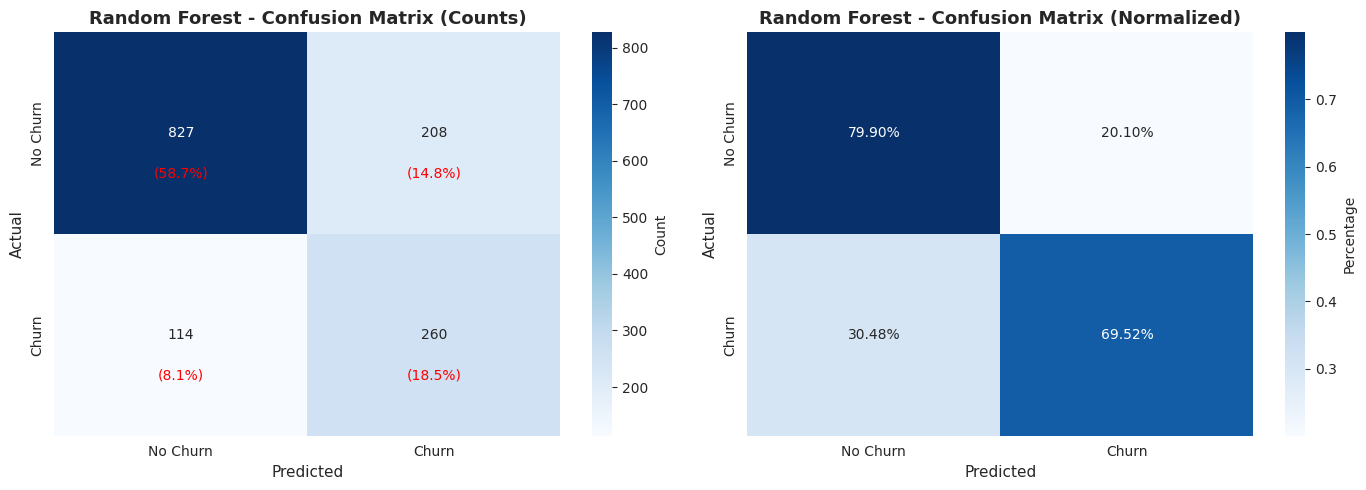


Confusion Matrix Breakdown:
  True Negatives (Correct No Churn):  827 (58.7%)
  False Positives (False Alarm):      208 (14.8%)
  False Negatives (Missed Churn):     114 (8.1%)
  True Positives (Correct Churn):     260 (18.5%)


In [156]:

cm_rf = confusion_matrix(y_test, y_pred_rf)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'],
            ax=axes[0], cbar_kws={'label': 'Count'})
axes[0].set_title('Random Forest - Confusion Matrix (Counts)', fontsize=13, fontweight='bold')
axes[0].set_ylabel('Actual', fontsize=11)
axes[0].set_xlabel('Predicted', fontsize=11)

for i in range(2):
    for j in range(2):
        text = axes[0].text(j + 0.5, i + 0.7,
                           f'({cm_rf[i, j]/cm_rf.sum()*100:.1f}%)',
                           ha="center", va="center", color="red", fontsize=10)

cm_rf_norm = cm_rf.astype('float') / cm_rf.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_rf_norm, annot=True, fmt='.2%', cmap='Blues',
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'],
            ax=axes[1], cbar_kws={'label': 'Percentage'})
axes[1].set_title('Random Forest - Confusion Matrix (Normalized)', fontsize=13, fontweight='bold')
axes[1].set_ylabel('Actual', fontsize=11)
axes[1].set_xlabel('Predicted', fontsize=11)

plt.tight_layout()
plt.show()

tn, fp, fn, tp = cm_rf.ravel()
print(f"\nConfusion Matrix Breakdown:")
print(f"  True Negatives (Correct No Churn):  {tn} ({tn/len(y_test)*100:.1f}%)")
print(f"  False Positives (False Alarm):      {fp} ({fp/len(y_test)*100:.1f}%)")
print(f"  False Negatives (Missed Churn):     {fn} ({fn/len(y_test)*100:.1f}%)")
print(f"  True Positives (Correct Churn):     {tp} ({tp/len(y_test)*100:.1f}%)")

Feature Importance

                 feature  importance
         high_risk_score    0.072125
contract_duration_months    0.067031
  total_to_monthly_ratio    0.053422
     charges_per_service    0.052221
       avg_monthly_spend    0.052048
       is_month_to_month    0.050621
          MonthlyCharges    0.049624
  contract_internet_risk    0.048033
               clv_proxy    0.046920
             value_score    0.044462
                  tenure    0.044229
           loyalty_score    0.035985
          tenure_squared    0.035780
  has_long_term_contract    0.035229
   contract_payment_risk    0.022470
             is_two_year    0.021703
       service_diversity    0.017994
         has_fiber_optic    0.016379
              tenure_bin    0.014012
               new_fiber    0.013725


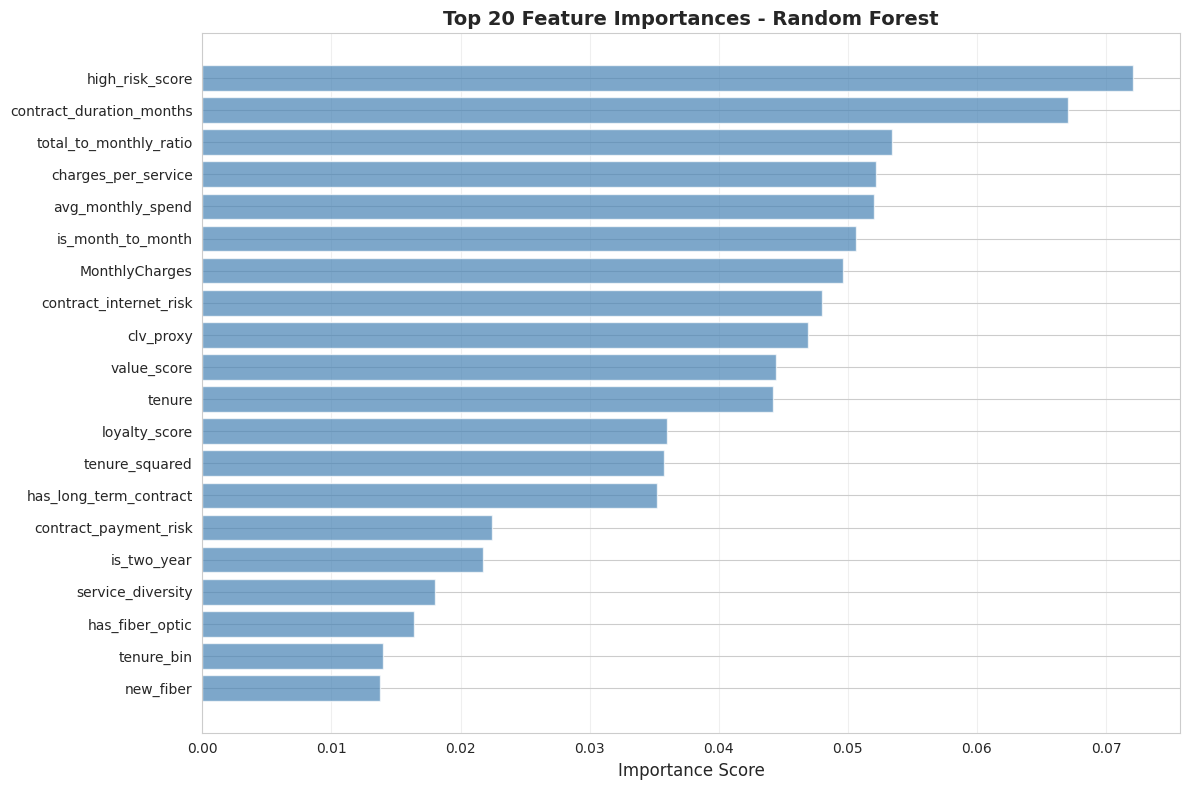

In [157]:

feature_importance_rf = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

top_features_rf = feature_importance_rf.head(20)

print(top_features_rf.to_string(index=False))

plt.figure(figsize=(12, 8))
plt.barh(range(len(top_features_rf)), top_features_rf['importance'], color='steelblue', alpha=0.7)
plt.yticks(range(len(top_features_rf)), top_features_rf['feature'])
plt.xlabel('Importance Score', fontsize=12)
plt.title('Top 20 Feature Importances - Random Forest', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()


## XGBOOST MODELING WITH SMOTETO HANDLE CLASS IMBALANCE

In [160]:

from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=4,            # Shorter trees to prevent overfitting
    learning_rate=0.05,     # Slow down learning for better generalization
    subsample=0.8,          # Use 80% of data per tree
    colsample_bytree=0.8,   # Use 80% of features per tree
    scale_pos_weight=1,     # Already handled by SMOTE
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

xgb_model.fit(X_train_res, y_train_res)

y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

print(f"XGBoost Accuracy:  {accuracy_score(y_test, y_pred_xgb):.4f}")
print(f"XGBoost Recall:    {recall_score(y_test, y_pred_xgb):.4f} (Ability to find churners)")
print(f"XGBoost Precision: {precision_score(y_test, y_pred_xgb):.4f}")
print(f"XGBoost ROC-AUC:   {roc_auc_score(y_test, y_prob_xgb):.4f}")

print("\nDetailed Report:")
print(classification_report(y_test, y_pred_xgb))

XGBoost Accuracy:  0.7608
XGBoost Recall:    0.6711 (Ability to find churners)
XGBoost Precision: 0.5398
XGBoost ROC-AUC:   0.8355

Detailed Report:
              precision    recall  f1-score   support

           0       0.87      0.79      0.83      1035
           1       0.54      0.67      0.60       374

    accuracy                           0.76      1409
   macro avg       0.70      0.73      0.71      1409
weighted avg       0.78      0.76      0.77      1409



## Feature Importance XgBoost


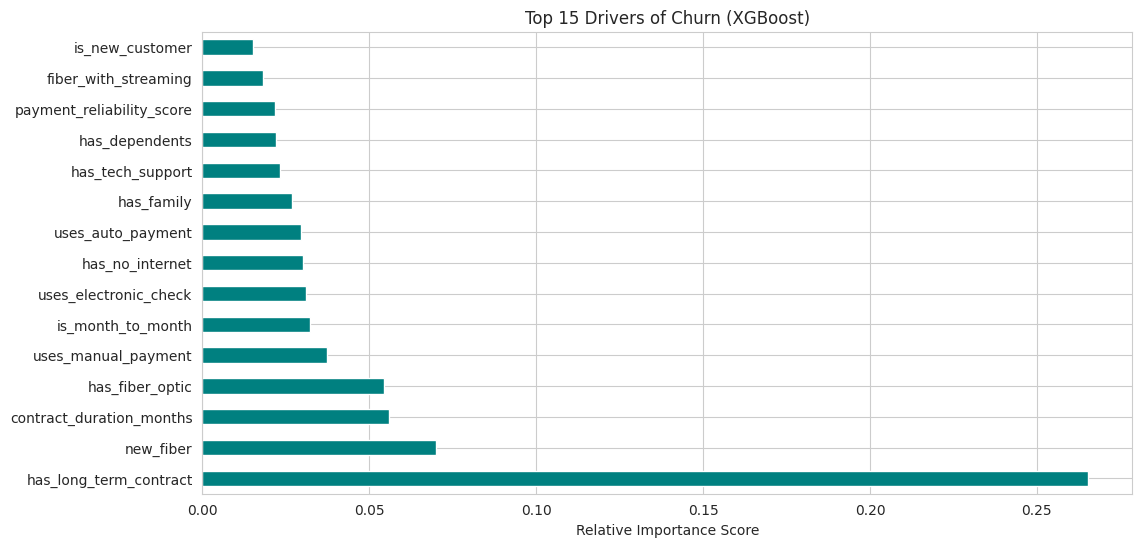

In [161]:
feat_importances = pd.Series(xgb_model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh', color='teal')
plt.title('Top 15 Drivers of Churn (XGBoost)')
plt.xlabel('Relative Importance Score')
plt.show()